In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
from collections import Counter

import warnings

<IPython.core.display.Javascript object>

In [3]:
warnings.filterwarnings(action="ignore", category=FutureWarning)

<IPython.core.display.Javascript object>

# Exploratory Data Analyses - EDA - Intercement data

In [4]:
df = pd.read_csv("../../../data/raw/partner_ii/db3_cement.csv")

<IPython.core.display.Javascript object>

In [5]:
df = df[df["strength_28d"].notna()].reset_index(drop=True)

<IPython.core.display.Javascript object>

In [6]:
df = df[df["unified_material_name"] == "Type III"].reset_index(drop=True)

<IPython.core.display.Javascript object>

In [7]:
df.shape

(244, 29)

<IPython.core.display.Javascript object>

In [8]:
df.head()

,sample_date,sample_id_plant,unified_material_name,raw_material_code,cao,sio2,al2o3,fe2o3,mgo,so3,...,loi,water_demand,setting_initial,strength_1d,strength_3d,strength_7d,strength_28d,blaine,sieve_32um,sieve_45um
0,2020-01-01 11:00:00+00:00,1058403,Type III,Daily Average Cement,62.33,19.42,4.86,3.22,3.74,3.08,...,2.62,29.0,120.0,24.38,35.93,41.30,50.87,570.0,1.08,99.46
1,2020-01-02 11:00:00+00:00,1058589,Type III,Daily Average Cement,62.22,19.30,4.80,3.23,3.60,3.20,...,3.08,29.0,115.0,24.38,36.11,37.84,49.72,573.0,0.87,99.47
2,2020-01-05 11:00:00+00:00,1059040,Type III,Daily Average Cement,63.56,19.50,4.78,3.43,3.11,2.94,...,2.00,29.0,115.0,26.52,38.07,43.91,49.76,547.0,1.33,99.31
3,2020-01-12 11:00:00+00:00,1060094,Type III,Daily Average Cement,62.14,19.40,4.86,3.37,3.12,3.19,...,2.84,29.0,120.0,24.78,36.42,40.39,48.93,562.0,1.63,99.01
4,2020-01-13 11:00:00+00:00,1060127,Type III,Daily Average Cement,62.30,19.29,4.72,3.31,2.09,3.03,...,3.13,29.0,135.0,23.30,34.31,39.26,46.97,566.0,1.68,98.95


<IPython.core.display.Javascript object>

In [9]:
df.tail()

,sample_date,sample_id_plant,unified_material_name,raw_material_code,cao,sio2,al2o3,fe2o3,mgo,so3,...,loi,water_demand,setting_initial,strength_1d,strength_3d,strength_7d,strength_28d,blaine,sieve_32um,sieve_45um
239,2021-12-16 11:00:00+00:00,1179001,Type III,Daily Average Cement,62.81,19.29,4.55,3.37,2.30,3.37,...,2.90,31.0,150.0,24.08,34.26,36.57,39.04,599.0,1.28,99.05
240,2021-12-17 11:00:00+00:00,1179186,Type III,Daily Average Cement,62.89,19.25,4.53,3.39,2.18,3.40,...,3.01,30.0,155.0,23.24,32.08,36.38,42.06,576.0,1.28,99.11
241,2021-12-19 11:00:00+00:00,1179579,Type III,Daily Average Cement,62.75,19.35,4.56,3.34,2.17,3.42,...,3.05,29.5,130.0,21.14,30.77,33.40,40.59,583.0,1.83,98.76
242,2021-12-27 11:00:00+00:00,1181001,Type III,Daily Average Cement,63.16,19.56,4.37,3.25,2.26,3.42,...,2.80,29.5,160.0,23.74,32.26,38.20,44.20,586.0,1.49,98.58
243,2021-12-28 11:00:00+00:00,1181128,Type III,Daily Average Cement,63.32,19.52,4.39,3.25,2.26,3.39,...,2.86,29.5,145.0,26.21,34.54,35.42,46.44,601.0,0.96,99.12


<IPython.core.display.Javascript object>

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sample_date            244 non-null    object 
 1   sample_id_plant        244 non-null    int64  
 2   unified_material_name  244 non-null    object 
 3   raw_material_code      244 non-null    object 
 4   cao                    242 non-null    float64
 5   sio2                   242 non-null    float64
 6   al2o3                  242 non-null    float64
 7   fe2o3                  242 non-null    float64
 8   mgo                    242 non-null    float64
 9   so3                    242 non-null    float64
 10  k2o                    242 non-null    float64
 11  na2o                   242 non-null    float64
 12  cl                     0 non-null      float64
 13  tio2                   0 non-null      float64
 14  alite                  237 non-null    float64
 15  belite

<IPython.core.display.Javascript object>

<h2>1. Structure Investigation</h2>

In [11]:
df.dtypes.value_counts()

float64    25
object      3
int64       1
Name: count, dtype: int64

<IPython.core.display.Javascript object>

<h3>1.1 Structure of numerical features</h3>

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sample_id_plant,244.0,1.112130e+06,34720.059553,1058403.00,1.081967e+06,1111069.500,1.136834e+06,1181128.00
cao,242.0,6.221517e+01,0.517907,60.89,6.188000e+01,62.140,6.247750e+01,64.75
sio2,242.0,1.922455e+01,0.297748,18.48,1.903250e+01,19.250,1.941000e+01,20.15
al2o3,242.0,4.679628e+00,0.130159,4.30,4.590000e+00,4.690,4.780000e+00,5.02
fe2o3,242.0,3.227149e+00,0.084748,3.03,3.160000e+00,3.230,3.280000e+00,3.48
mgo,242.0,3.023347e+00,0.343752,1.76,2.875000e+00,3.040,3.220000e+00,3.99
so3,242.0,3.257397e+00,0.133685,2.72,3.170000e+00,3.220,3.390000e+00,3.58
k2o,242.0,6.552893e-01,0.054347,0.52,6.200000e-01,0.640,6.900000e-01,0.82
na2o,242.0,8.206612e-02,0.036002,0.01,5.000000e-02,0.075,1.100000e-01,0.16
cl,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

<h3>1.2 Structure of Non-Numeric features</h3>

In [13]:
df.describe(exclude="number").T

,count,unique,top,freq
sample_date,244,244,2020-01-01 11:00:00+00:00,1
unified_material_name,244,1,Type III,244
raw_material_code,244,1,Daily Average Cement,244


<IPython.core.display.Javascript object>

In [14]:
df["unified_material_name"].value_counts()

unified_material_name
Type III    244
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [15]:
dates = df["sample_date"]

<IPython.core.display.Javascript object>

In [16]:
print(dates.min())
print(dates.max())

2020-01-01 11:00:00+00:00
2021-12-28 11:00:00+00:00


<IPython.core.display.Javascript object>

In [17]:
dates

0      2020-01-01 11:00:00+00:00
1      2020-01-02 11:00:00+00:00
2      2020-01-05 11:00:00+00:00
3      2020-01-12 11:00:00+00:00
4      2020-01-13 11:00:00+00:00
                 ...            
239    2021-12-16 11:00:00+00:00
240    2021-12-17 11:00:00+00:00
241    2021-12-19 11:00:00+00:00
242    2021-12-27 11:00:00+00:00
243    2021-12-28 11:00:00+00:00
Name: sample_date, Length: 244, dtype: object

<IPython.core.display.Javascript object>

In [18]:
for column in df.dtypes[df.dtypes == object].keys():
    print(column, df[column].unique())


sample_date ['2020-01-01 11:00:00+00:00' '2020-01-02 11:00:00+00:00'
 '2020-01-05 11:00:00+00:00' '2020-01-12 11:00:00+00:00'
 '2020-01-13 11:00:00+00:00' '2020-01-14 11:00:00+00:00'
 '2020-01-15 11:00:00+00:00' '2020-01-22 11:00:00+00:00'
 '2020-01-23 11:00:00+00:00' '2020-01-24 11:00:00+00:00'
 '2020-01-26 11:00:00+00:00' '2020-01-27 11:00:00+00:00'
 '2020-01-28 11:00:00+00:00' '2020-02-14 11:00:00+00:00'
 '2020-02-15 11:00:00+00:00' '2020-02-16 11:00:00+00:00'
 '2020-02-18 11:00:00+00:00' '2020-02-19 11:00:00+00:00'
 '2020-02-20 11:00:00+00:00' '2020-02-21 11:00:00+00:00'
 '2020-02-24 11:00:00+00:00' '2020-03-01 11:00:00+00:00'
 '2020-03-05 11:00:00+00:00' '2020-03-06 11:00:00+00:00'
 '2020-03-07 11:00:00+00:00' '2020-03-13 10:00:00+00:00'
 '2020-03-14 10:00:00+00:00' '2020-03-15 10:00:00+00:00'
 '2020-03-17 10:00:00+00:00' '2020-03-18 10:00:00+00:00'
 '2020-03-19 10:00:00+00:00' '2020-03-20 10:00:00+00:00'
 '2020-03-24 10:00:00+00:00' '2020-03-25 10:00:00+00:00'
 '2020-03-30 10:00:

<IPython.core.display.Javascript object>

<h2>2. Quality Investigation</h2>

<h3>2.1. Unique values</h3>

<Axes: title={'center': 'Unique Values per feature'}>

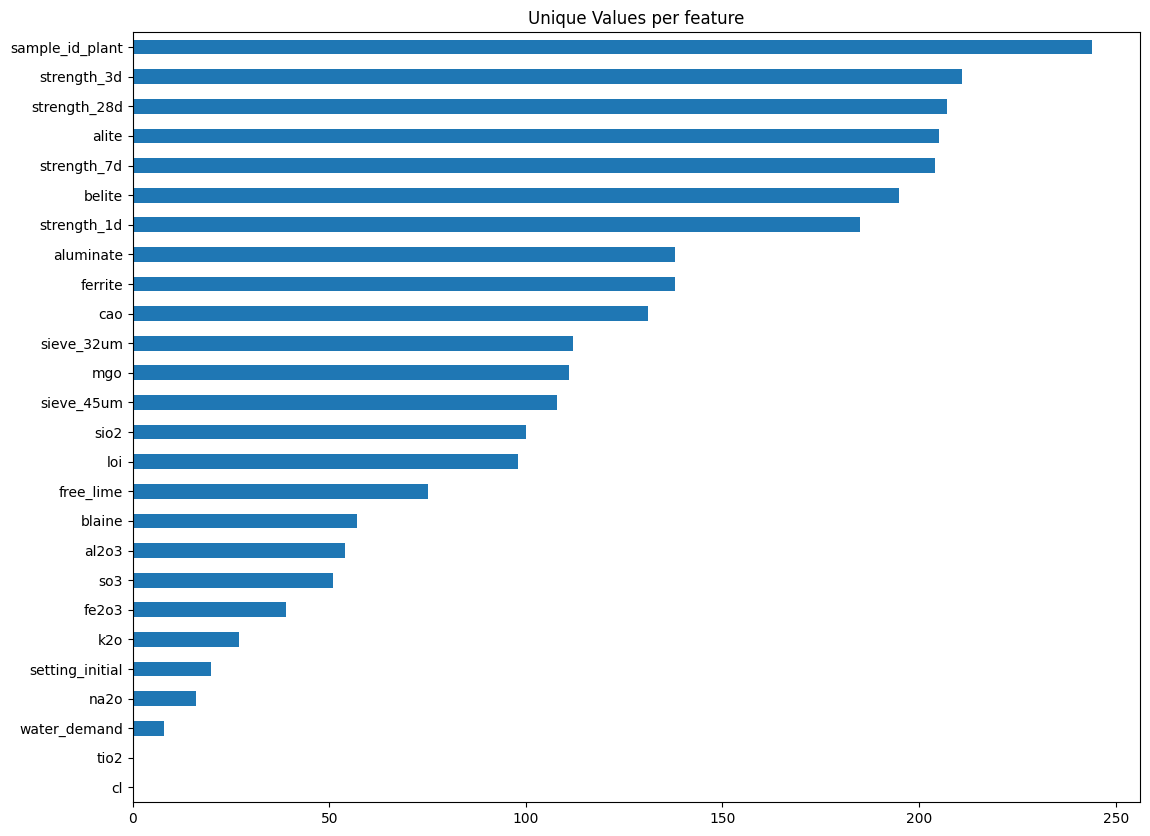

<IPython.core.display.Javascript object>

In [19]:
unique_values = df.select_dtypes(include="number").nunique().sort_values()

unique_values.plot.barh(logy=False, figsize=(13, 10), title="Unique Values per feature")

(array([0, 1, 2]),
 [Text(0, 0, 'unified_material_name'),
  Text(1, 0, 'raw_material_code'),
  Text(2, 0, 'sample_date')])

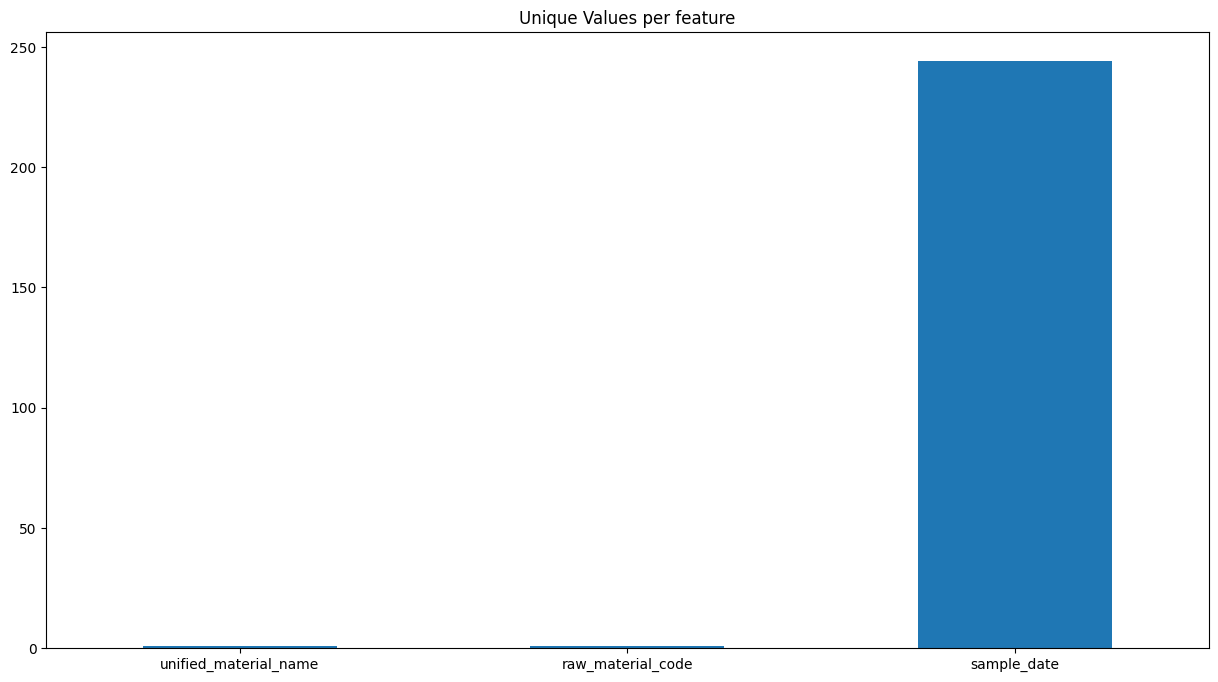

<IPython.core.display.Javascript object>

In [20]:
unique_values = df.select_dtypes(exclude="number").nunique().sort_values()

unique_values.plot.bar(logy=False, figsize=(15, 8), title="Unique Values per feature")

plt.xticks(rotation=0)

<h3>2.2. Missing values</h3>

In [21]:
print(
    "There are",
    df.isna().any().sum(),
    "variables with missing values from a total of",
    df.shape[1],
)

There are 17 variables with missing values from a total of 29


<IPython.core.display.Javascript object>

In [22]:
df.isna().any().sort_values()

sample_date              False
blaine                   False
strength_28d             False
strength_3d              False
setting_initial          False
water_demand             False
loi                      False
sieve_32um               False
sieve_45um               False
sample_id_plant          False
unified_material_name    False
raw_material_code        False
so3                       True
strength_7d               True
strength_1d               True
cao                       True
sio2                      True
al2o3                     True
free_lime                 True
ferrite                   True
aluminate                 True
belite                    True
fe2o3                     True
tio2                      True
cl                        True
na2o                      True
k2o                       True
mgo                       True
alite                     True
dtype: bool

<IPython.core.display.Javascript object>

In [23]:
df.isna().sum().sort_values(ascending=False).to_frame(
    name="Missing (count)"
).style.background_gradient(cmap="Reds")

,Missing (count)
tio2,244
cl,244
alite,7
ferrite,7
aluminate,7
belite,7
free_lime,6
so3,2
na2o,2
k2o,2


<IPython.core.display.Javascript object>

In [24]:
print("There are a total of ", df.isna().sum().sum(), "missing values.")

There are a total of  540 missing values.


<IPython.core.display.Javascript object>

Text(0, 0.5, 'Count of quantity of missing values')

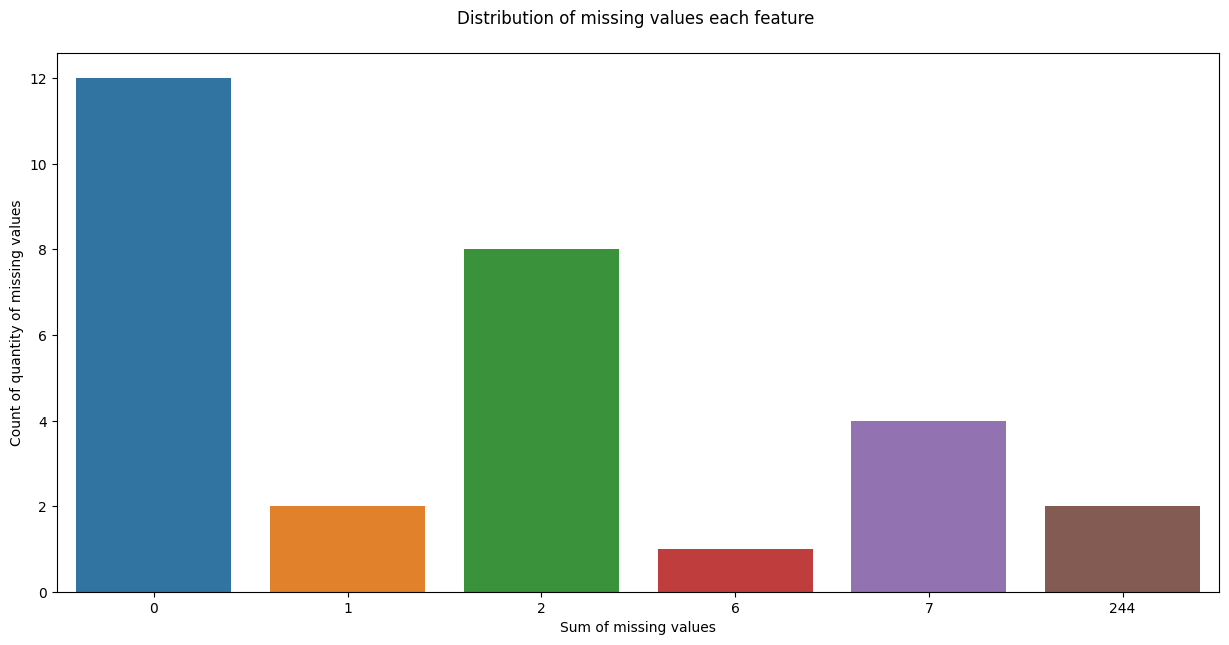

<IPython.core.display.Javascript object>

In [25]:
plt.figure(figsize=(15, 7))
sns.countplot(data=df.isna().sum(), x=df.isna().sum().index)
plt.title("Distribution of missing values each feature \n")
plt.xlabel("Sum of missing values")
plt.ylabel("Count of quantity of missing values")

<BarContainer object of 29 artists>

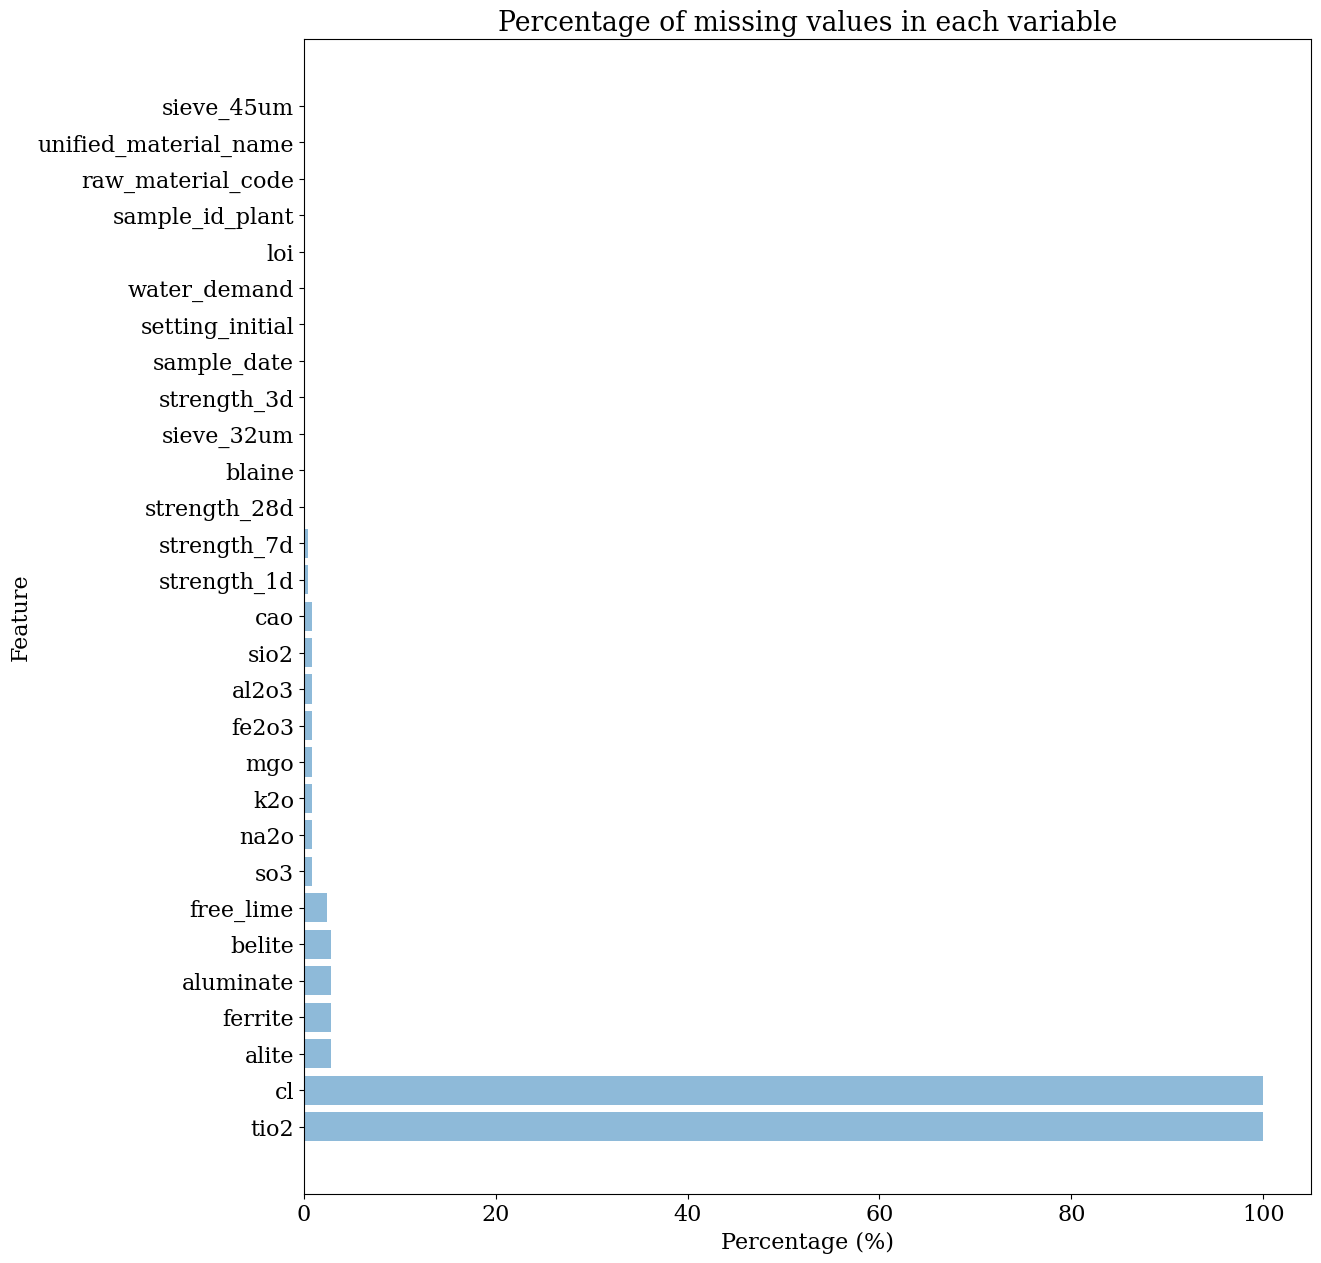

<IPython.core.display.Javascript object>

In [26]:
miss_perc = df.isnull().sum() / df.shape[0] * 100
miss_perc = miss_perc.sort_values(ascending=False)
plt.rc("font", family="serif", size=16)
plt.figure(figsize=(13, 15))
plt.title("Percentage of missing values in each variable")
plt.xlabel("Percentage (%)")
plt.ylabel("Feature")
plt.barh(miss_perc.index, miss_perc.round(2), alpha=0.5)

In [27]:
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False).to_frame(
    name="Missing (%)"
).style.background_gradient(cmap="Reds")

,Missing (%)
tio2,100.000000
cl,100.000000
alite,2.868852
ferrite,2.868852
aluminate,2.868852
belite,2.868852
free_lime,2.459016
so3,0.819672
na2o,0.819672
k2o,0.819672


<IPython.core.display.Javascript object>

In [28]:
df["strength_28d"].notna().sum()

244

<IPython.core.display.Javascript object>

<BarContainer object of 29 artists>

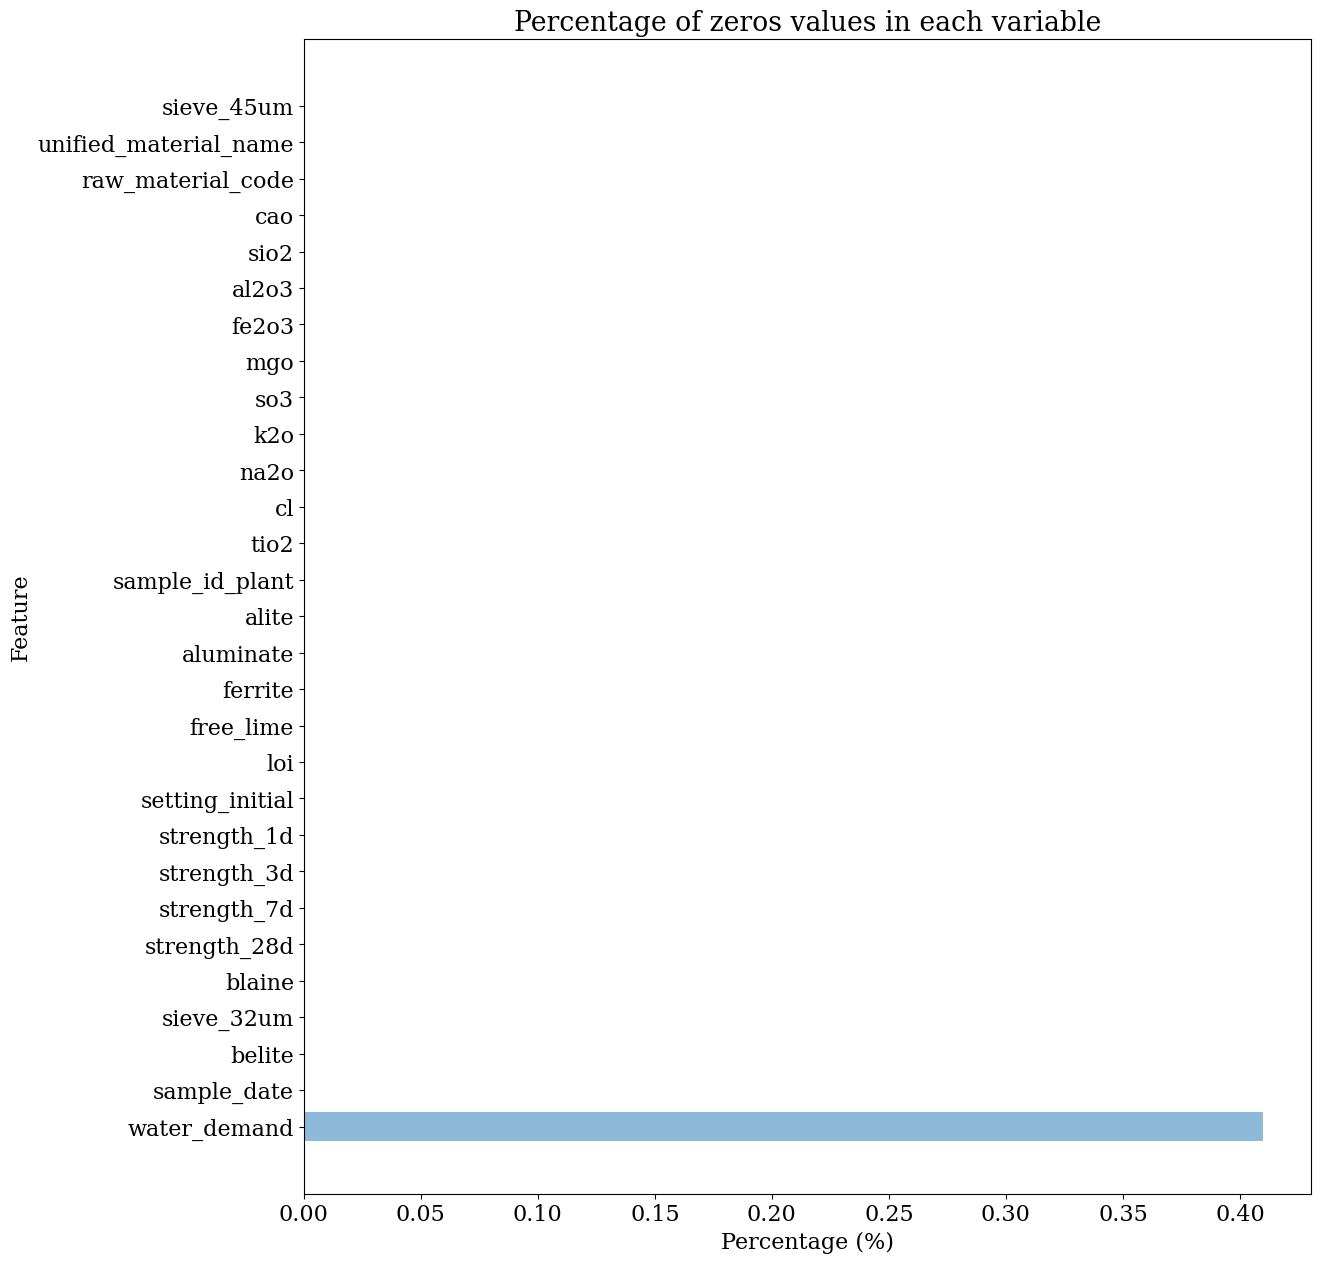

<IPython.core.display.Javascript object>

In [29]:
zeros_perc = (df == 0).sum(axis=0) / df.shape[0] * 100
zeros_perc = zeros_perc.sort_values(ascending=False)
plt.rc("font", family="serif", size=16)
plt.figure(figsize=(13, 15))
plt.title("Percentage of zeros values in each variable")
plt.xlabel("Percentage (%)")
plt.ylabel("Feature")
plt.barh(zeros_perc.index, zeros_perc.round(2), alpha=0.5)

<h3>2.4. Duplicates</h3>

In [30]:
n_duplicates = df.duplicated().sum()
print(f"There are {n_duplicates} duplicates samples.")

There are 0 duplicates samples.


<IPython.core.display.Javascript object>

In [31]:
n_duplicates = df.drop(["sample_date"], axis=1).duplicated().sum()
print(f"There are {n_duplicates} duplicates samples.")

There are 0 duplicates samples.


<IPython.core.display.Javascript object>

<h2>3. Content Investigation</h2>

<h3>3.1. Feature distribution</h3>

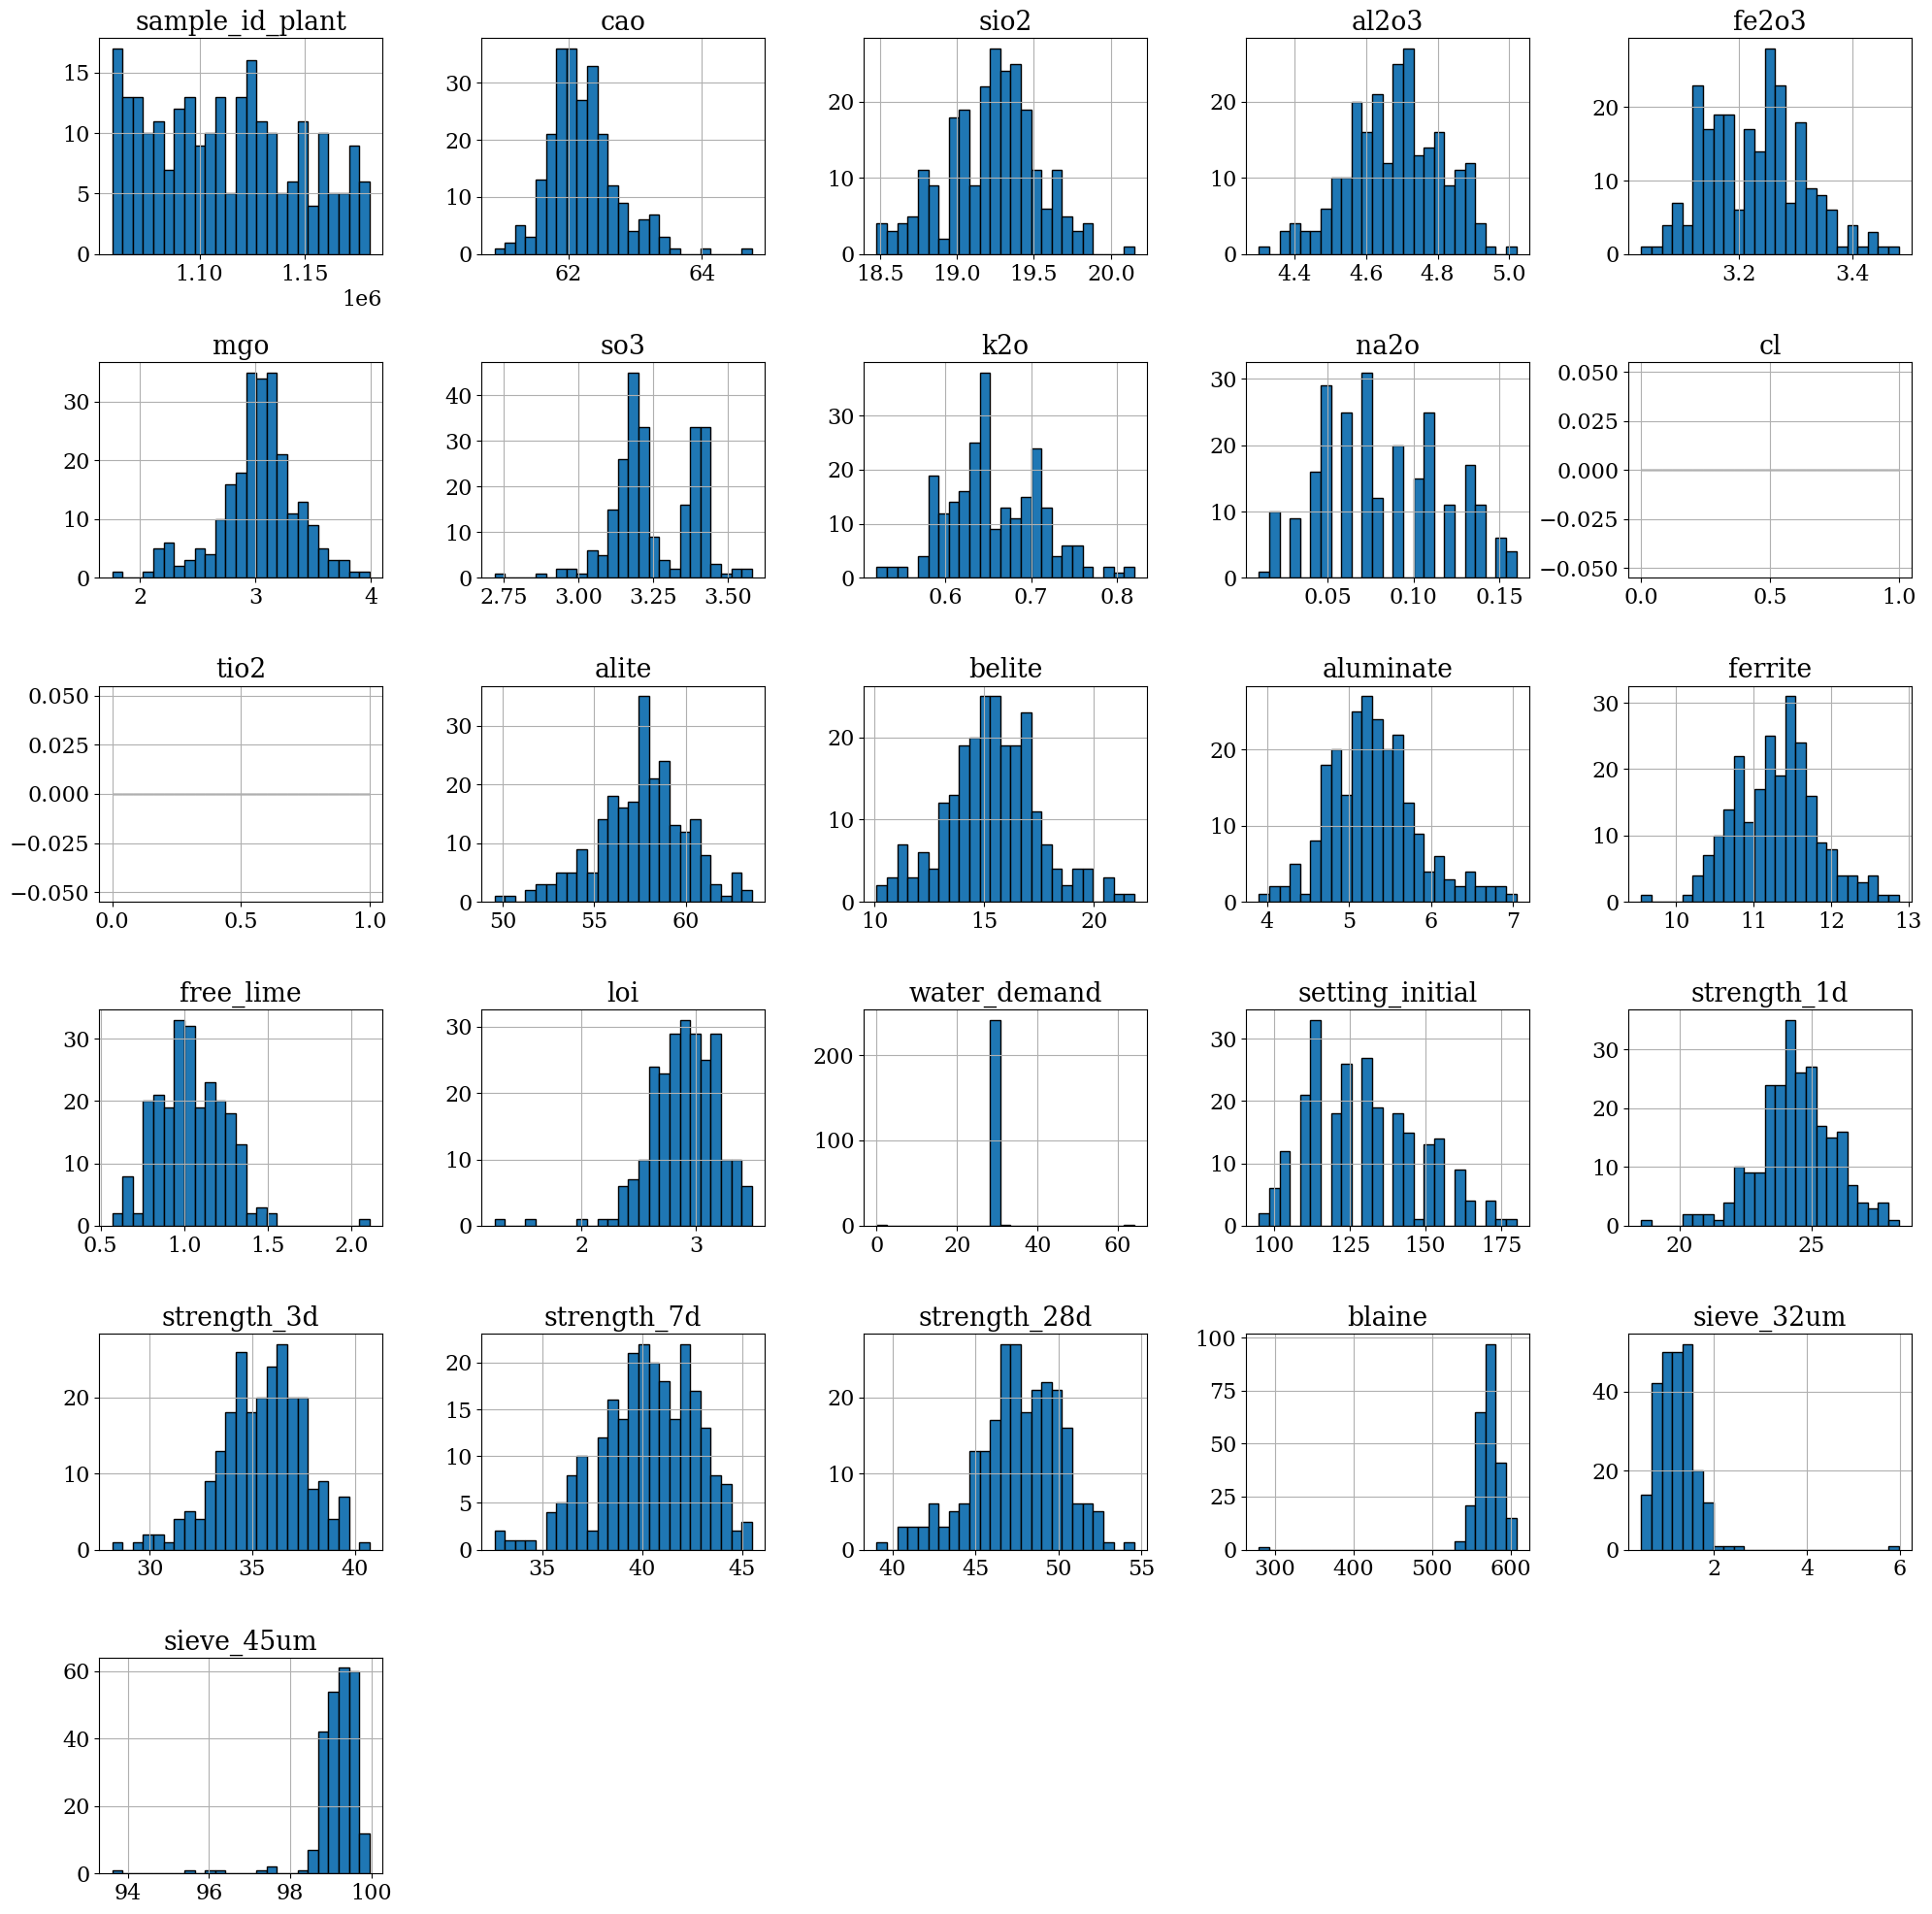

<IPython.core.display.Javascript object>

In [32]:
df.hist(bins=25, figsize=(20, 20), layout=(-1, 5), edgecolor="black")
plt.tight_layout()

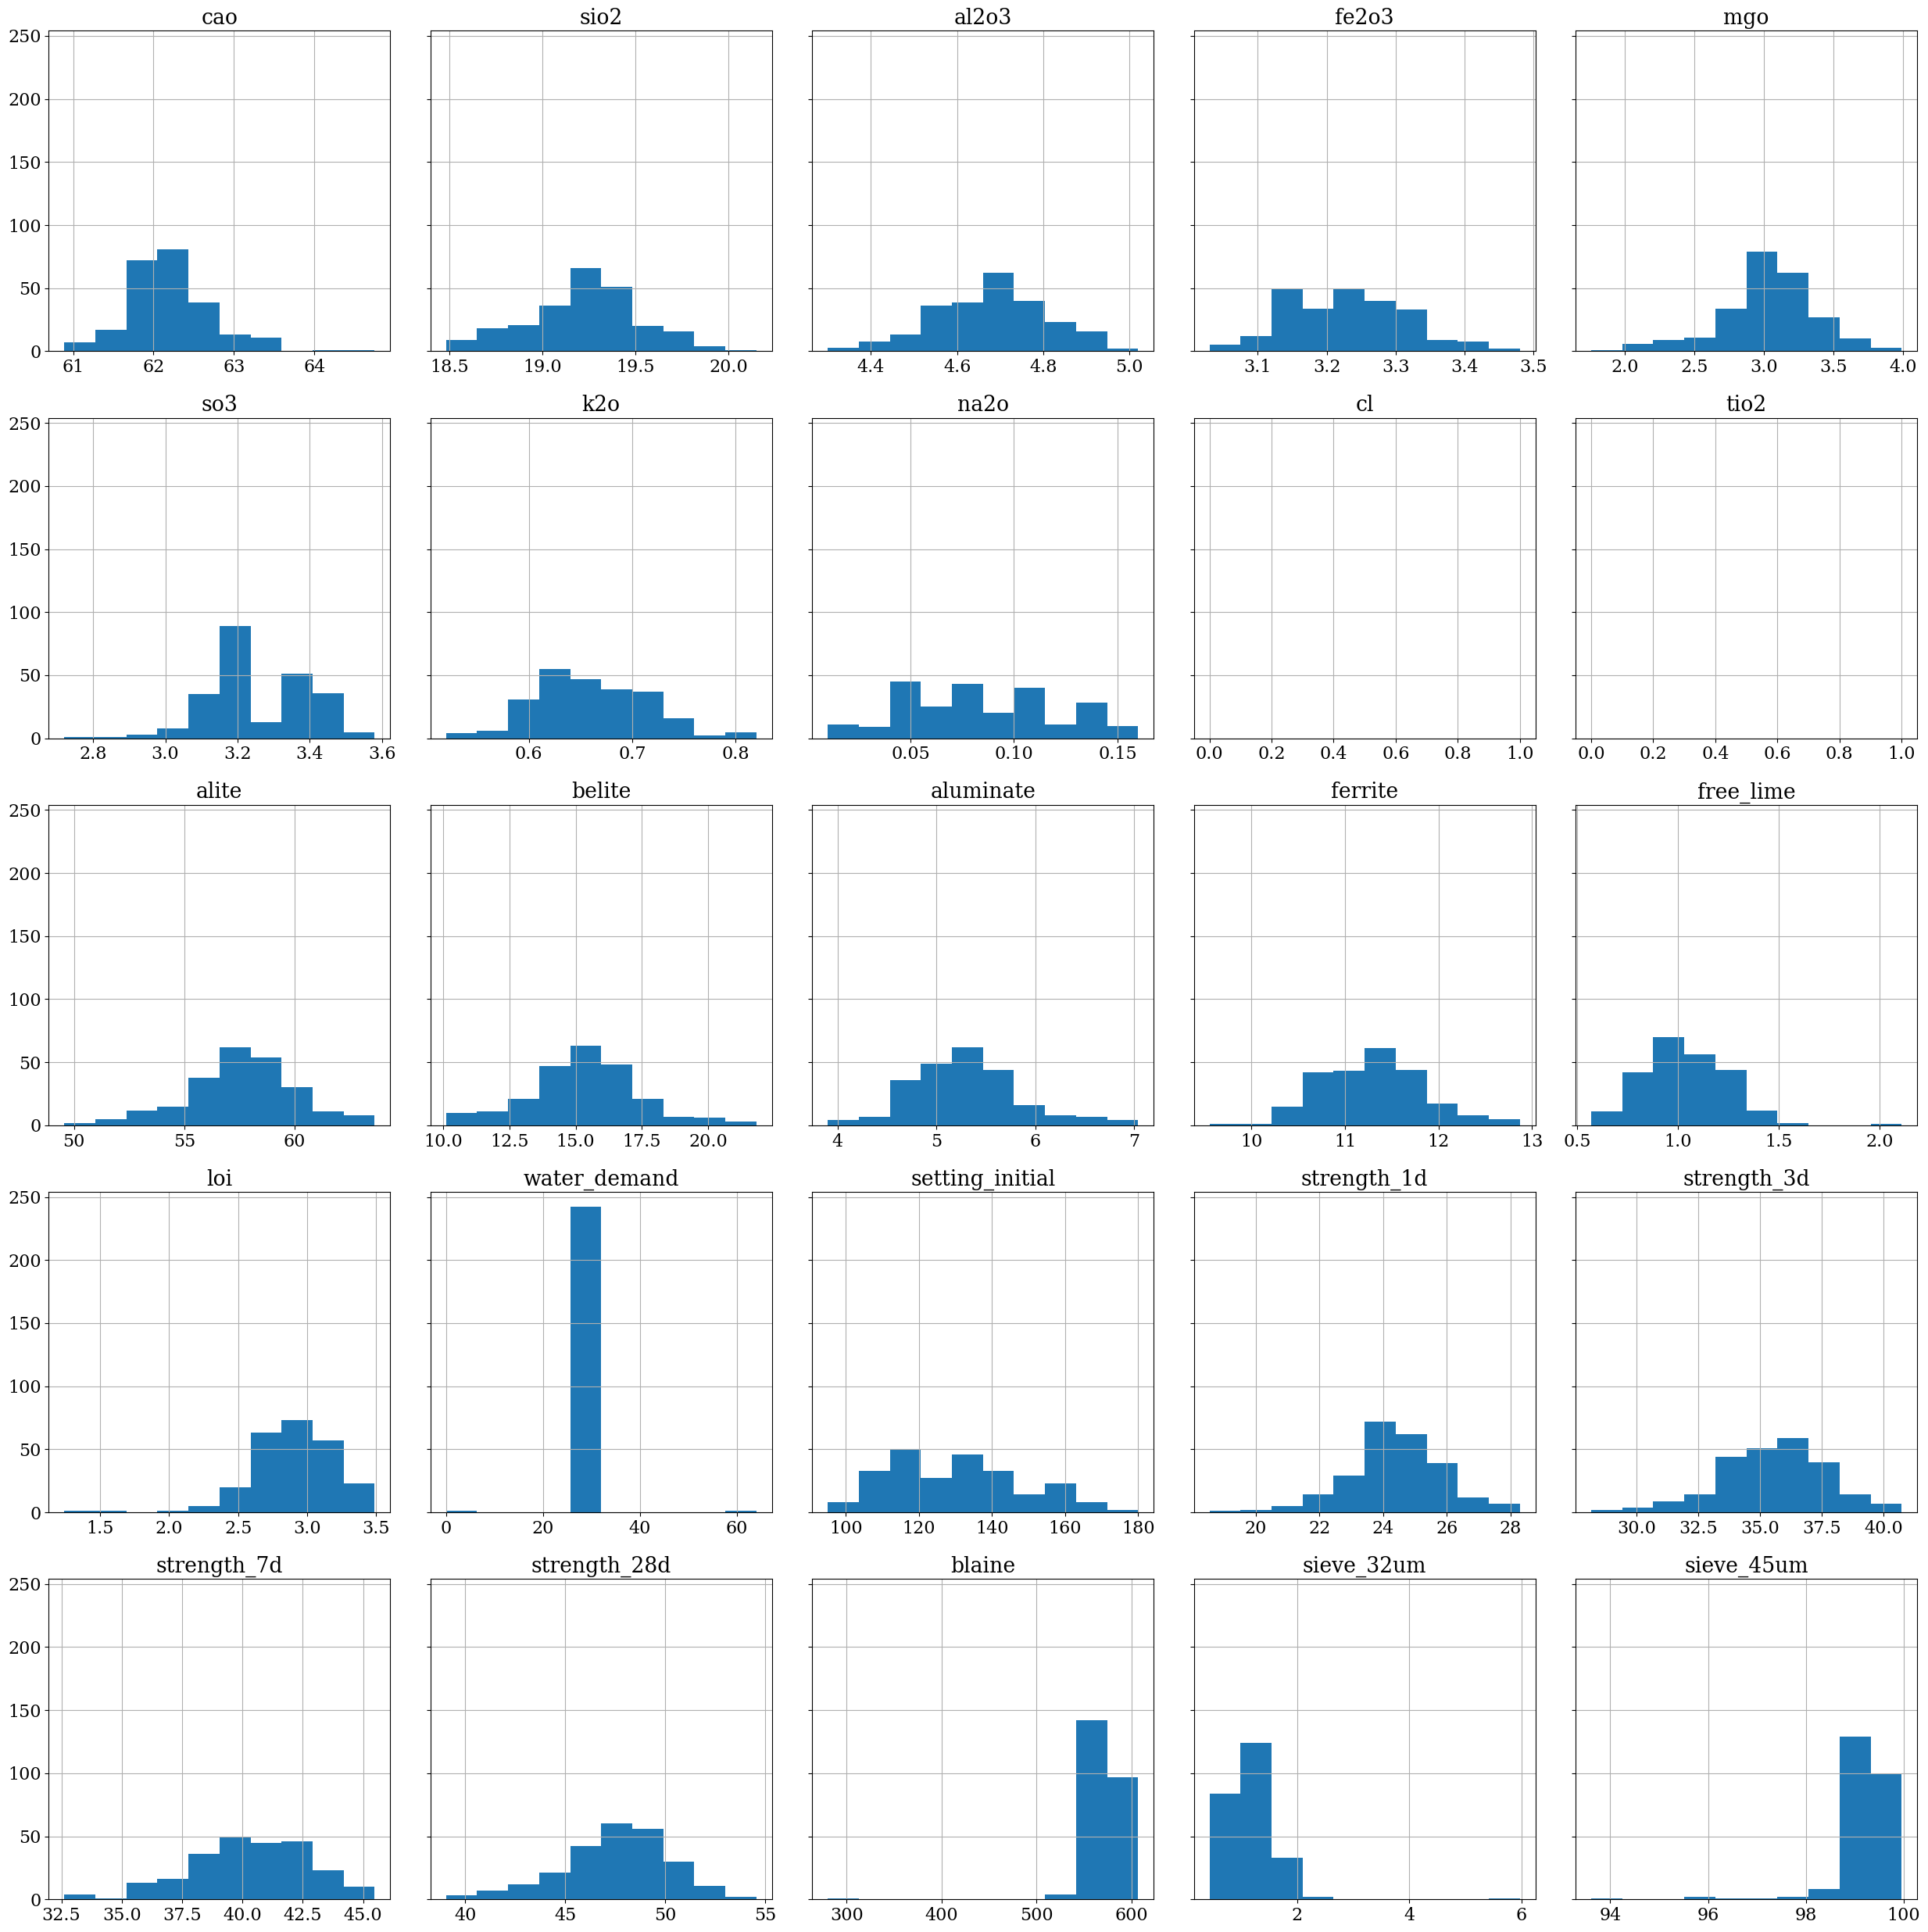

<IPython.core.display.Javascript object>

In [33]:
df.select_dtypes(include="float64").hist(figsize=(25, 25), sharey=True)
plt.tight_layout()

<h3>Data distribution - KDE plot</h3>

Kdeplot is a Kernel Distribution Estimation Plot which depicts the probability density function of the continuous or non-parametric data variables

/tmp/ipykernel_94304/1545704410.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], shade=True)
/tmp/ipykernel_94304/1545704410.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], shade=True)
/tmp/ipykernel_94304/1545704410.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], shade=True)
/tmp/ipykernel_94304/1545704410.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], shade=True)
/tmp/ipykernel_94304/1545704410.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], shade=T

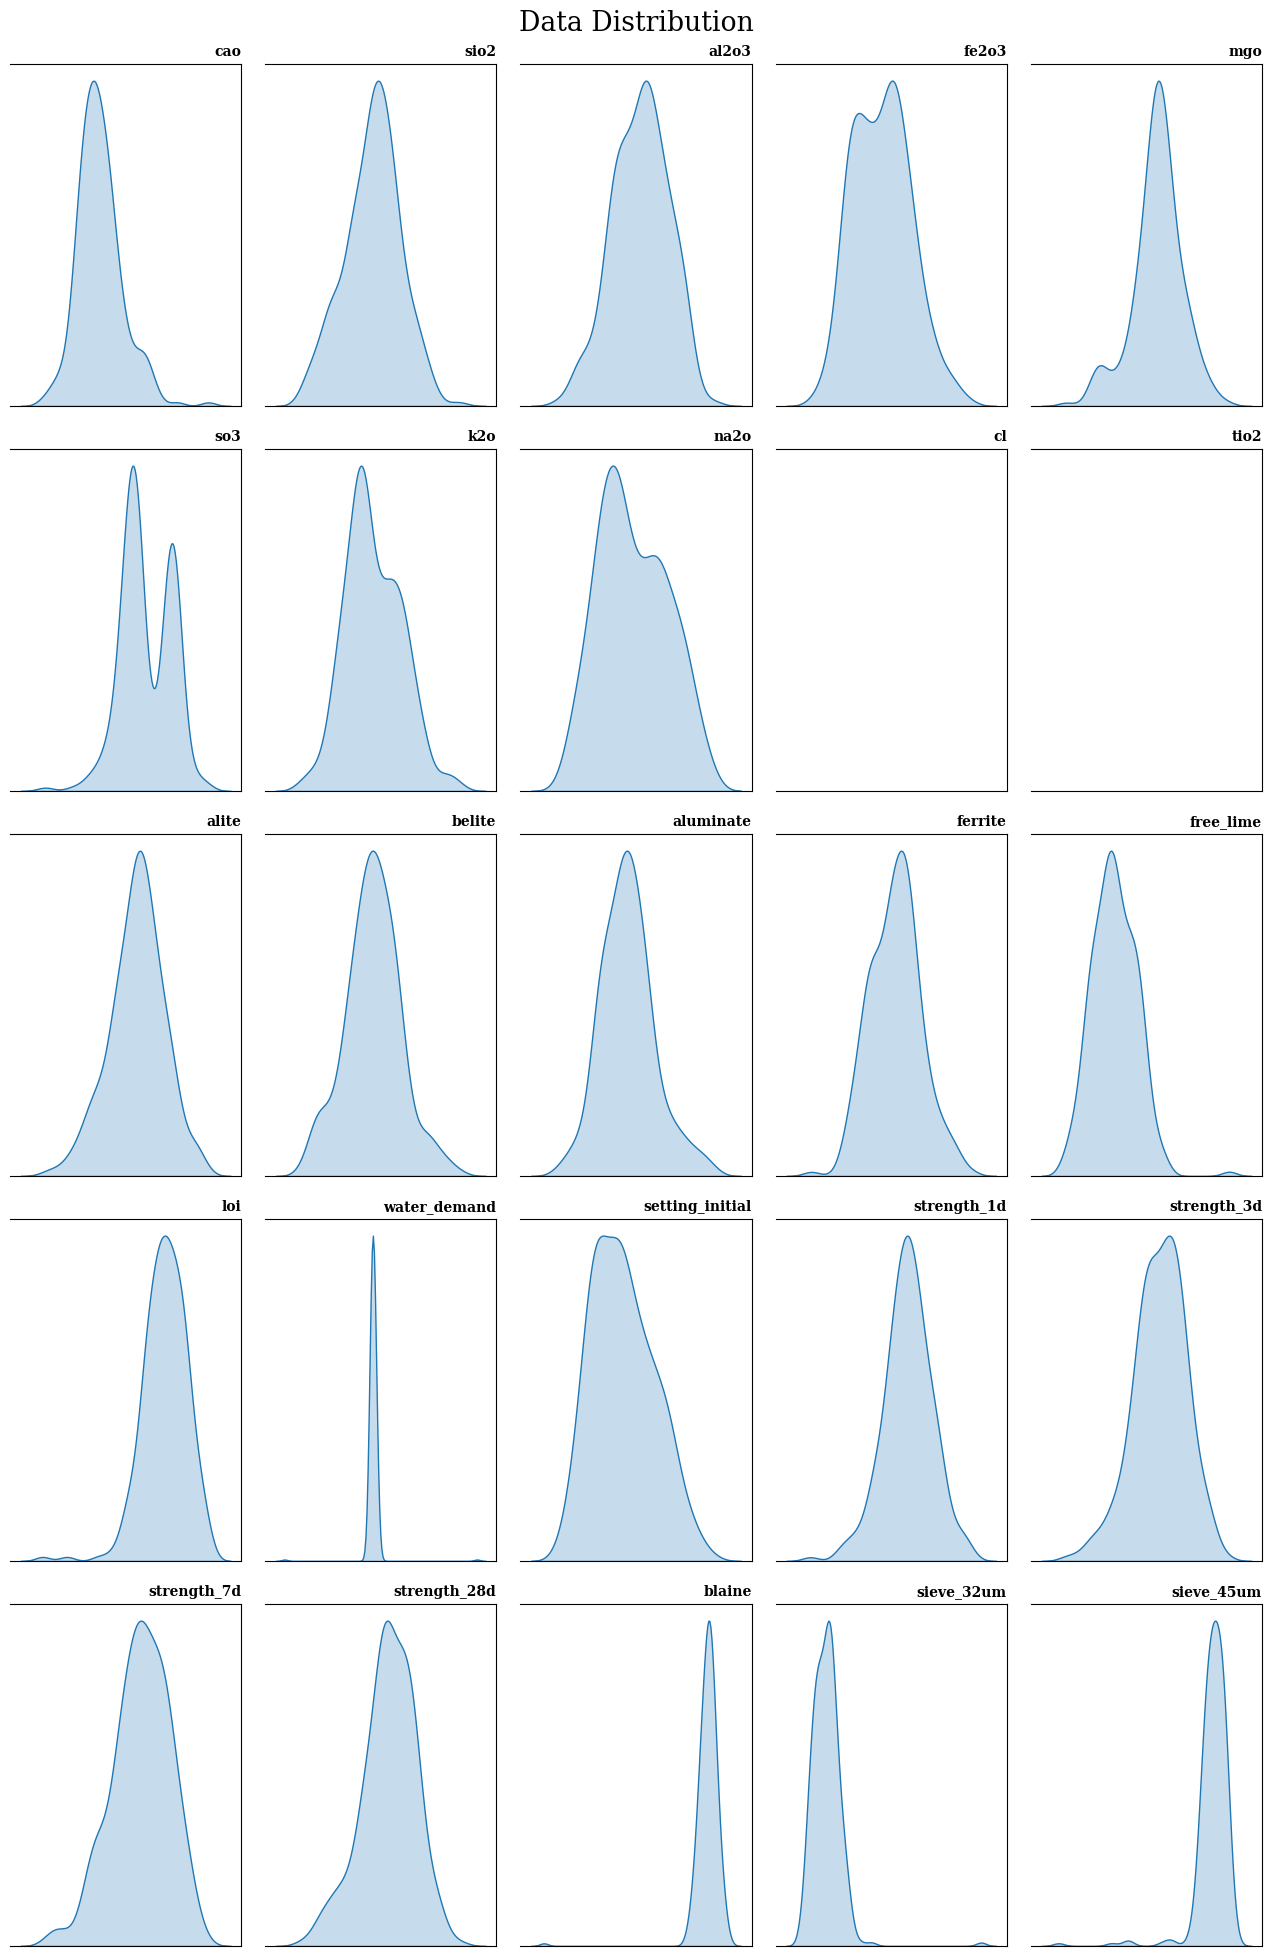

<IPython.core.display.Javascript object>

In [34]:
fig, axes = plt.subplots(5, 5, figsize=(13, 20))
axes = axes.flatten()
sns.set_palette(sns.color_palette(["#2a9d8f", "#e9c46a"]))
columns = df.select_dtypes(include="float64").columns

for i, ax in enumerate(axes):
    sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], shade=True)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.spines["left"].set_visible(False)
    ax.set_title(columns[i], loc="right", weight="bold", fontsize=10)

# fig.supxlabel('Average (float features)', ha='center', fontweight='bold')
fig.suptitle("Data Distribution")

fig.tight_layout()
plt.show()

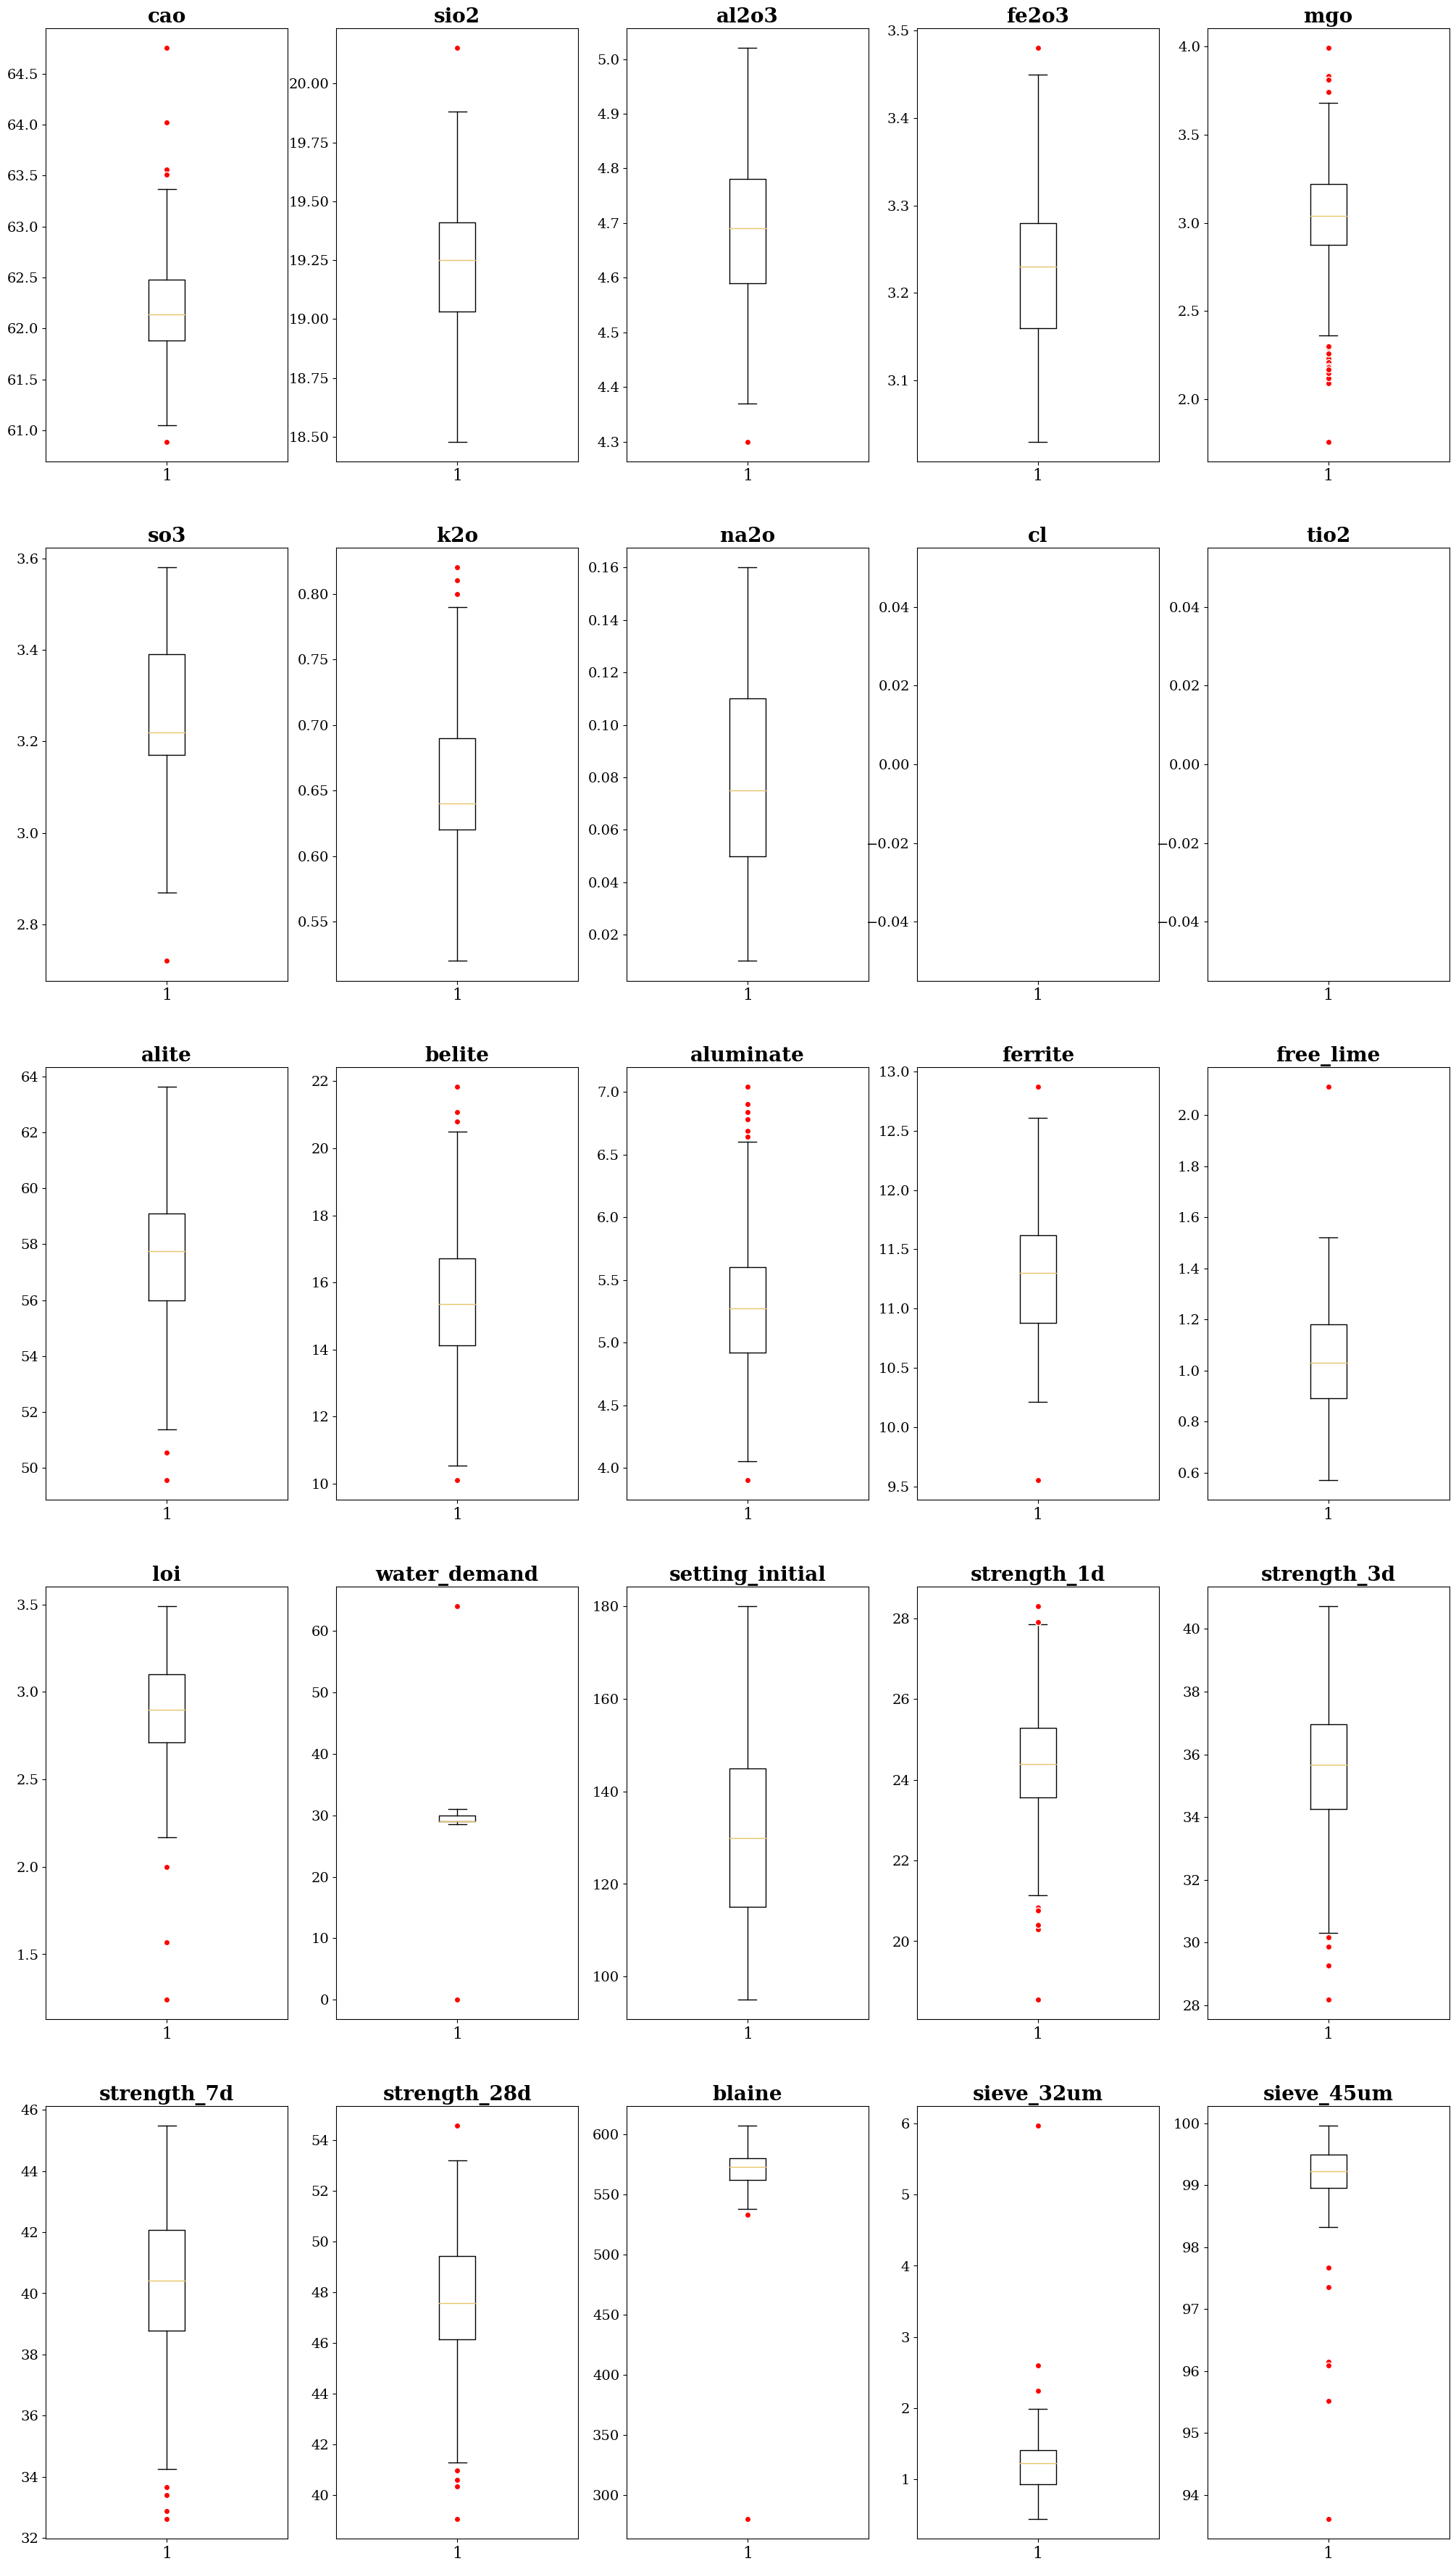

<IPython.core.display.Javascript object>

In [35]:
# Creating subplot of each column with its own scale
float64_columns = df.select_dtypes(include="float64").columns
df_float64_columns = df[float64_columns]

red_circle = dict(markerfacecolor="red", marker="o", markeredgecolor="white")
fig, axs = plt.subplots(5, 5, figsize=(25, 45))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_float64_columns.iloc[:, i].dropna(), flierprops=red_circle)
    ax.set_title(df_float64_columns.columns[i], fontsize=20, fontweight="bold")
    ax.tick_params(axis="y", labelsize=14)

<h3>3.3. Feature Relationship</h3>

<h4>3.3.1 Pearson</h4>

<Axes: >

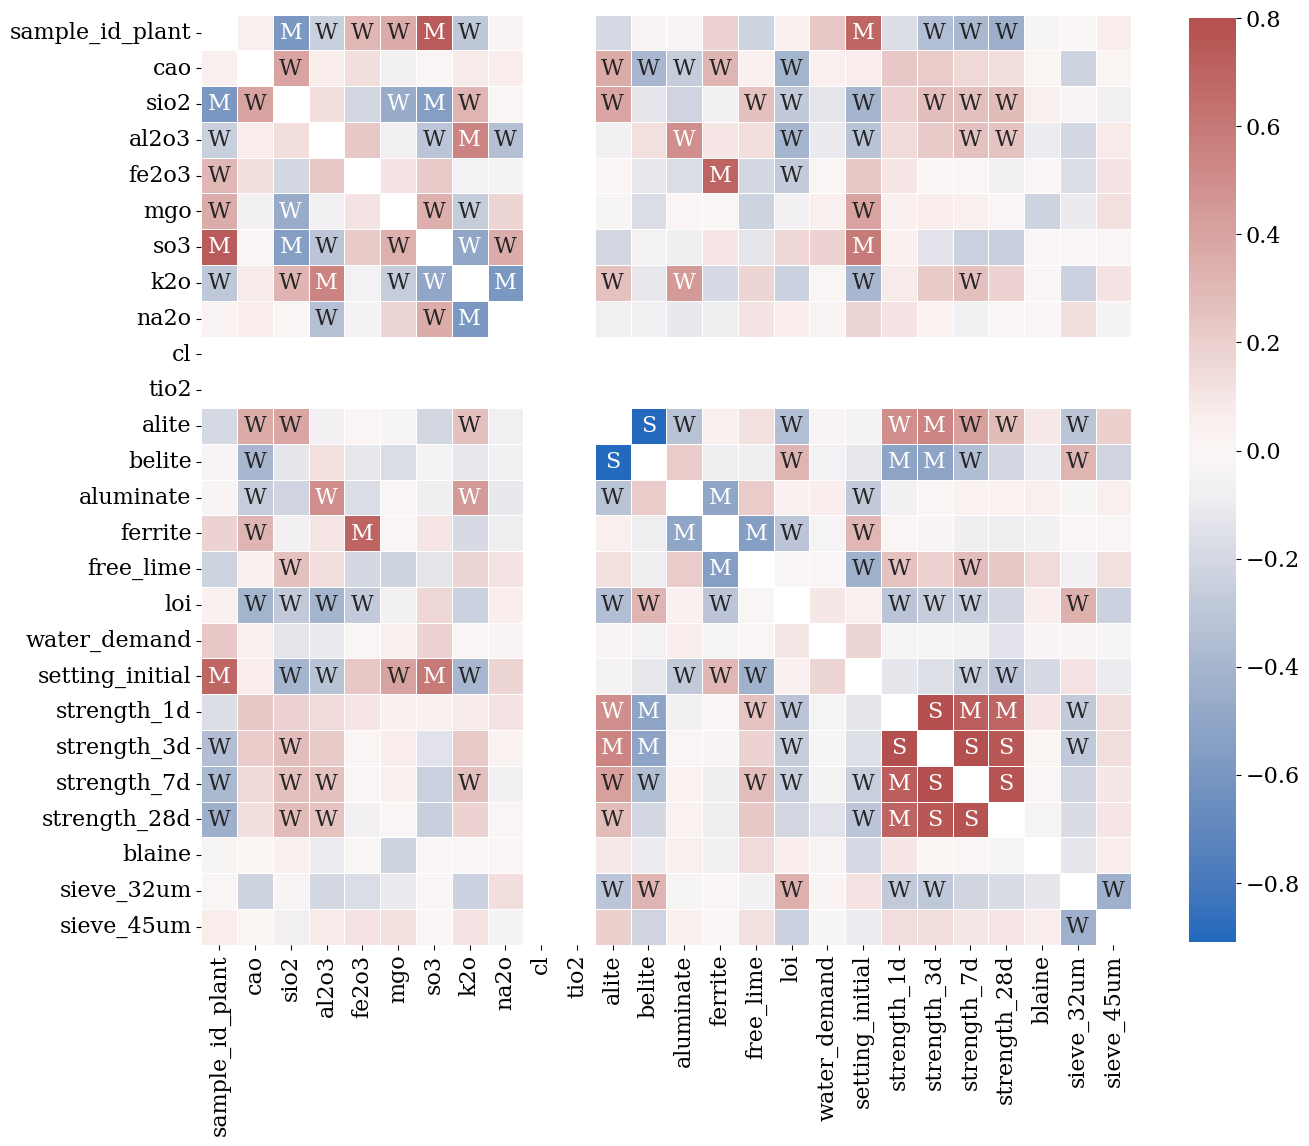

<IPython.core.display.Javascript object>

In [36]:
df_corr = df.select_dtypes(exclude=object).corr(method="pearson")

# Create labels for the correlation matrix
labels = np.where(
    np.abs(df_corr) >= 0.75,
    "S",
    np.where(np.abs(df_corr) > 0.5, "M", np.where(np.abs(df_corr) > 0.25, "W", "")),
)

# Plot correlation matrix
plt.figure(figsize=(15, 15))

sns.heatmap(
    df_corr,
    mask=np.eye(len(df_corr)),
    square=True,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
)

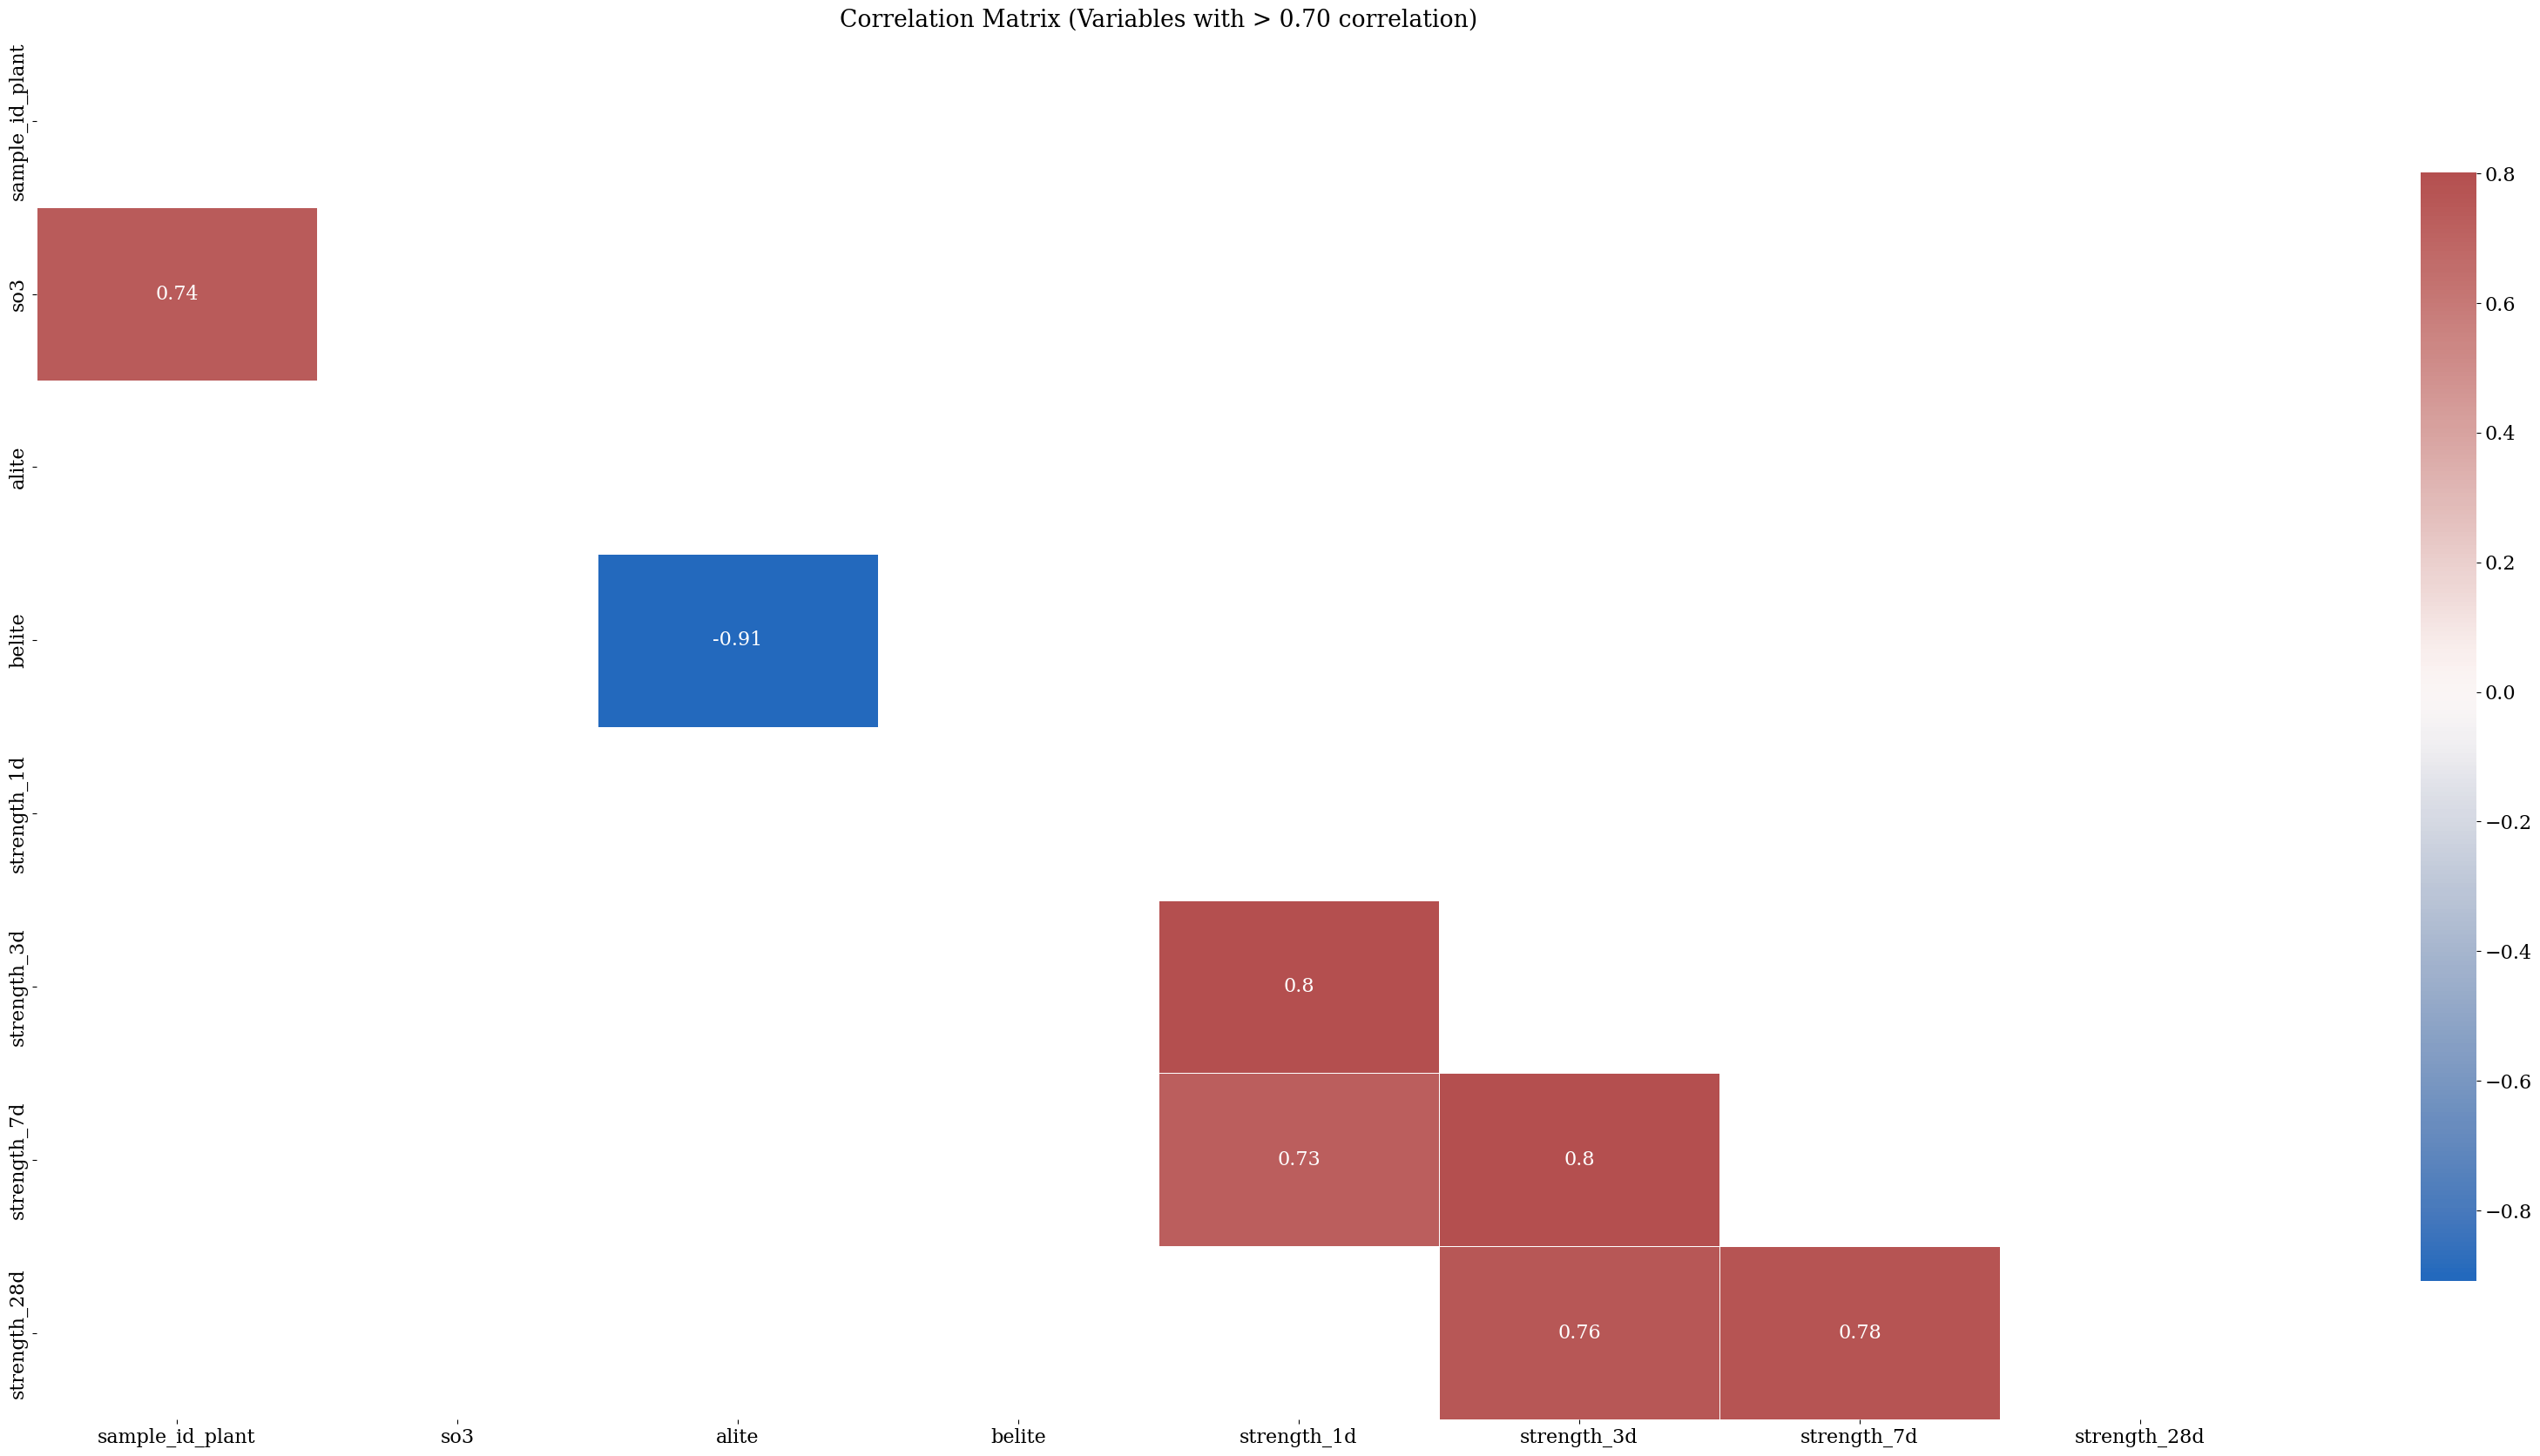

<IPython.core.display.Javascript object>

In [37]:
df_corr = df.select_dtypes(exclude=object).corr(method="pearson")


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [38]:
corr_matrix = df.select_dtypes(exclude=object).corr(method="pearson").abs()

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

alite            belite          0.908897
strength_3d      strength_7d     0.801173
strength_1d      strength_3d     0.797373
strength_7d      strength_28d    0.779977
strength_3d      strength_28d    0.756616
sample_id_plant  so3             0.735358
strength_1d      strength_7d     0.725019
dtype: float64

<IPython.core.display.Javascript object>

In [39]:
sol[sol.index.map(lambda x: "strength_28d" in x)]

strength_7d      strength_28d    0.779977
strength_3d      strength_28d    0.756616
strength_1d      strength_28d    0.695669
sample_id_plant  strength_28d    0.445706
setting_initial  strength_28d    0.307764
sio2             strength_28d    0.285830
alite            strength_28d    0.285187
al2o3            strength_28d    0.251144
so3              strength_28d    0.248244
free_lime        strength_28d    0.227958
loi              strength_28d    0.211323
belite           strength_28d    0.210197
k2o              strength_28d    0.180768
strength_28d     sieve_32um      0.175621
water_demand     strength_28d    0.137459
cao              strength_28d    0.130038
strength_28d     sieve_45um      0.103881
ferrite          strength_28d    0.092766
fe2o3            strength_28d    0.064604
strength_28d     blaine          0.041062
aluminate        strength_28d    0.036468
na2o             strength_28d    0.004243
mgo              strength_28d    0.002845
dtype: float64

<IPython.core.display.Javascript object>

<h4>3.3.2 Spearman</h4>

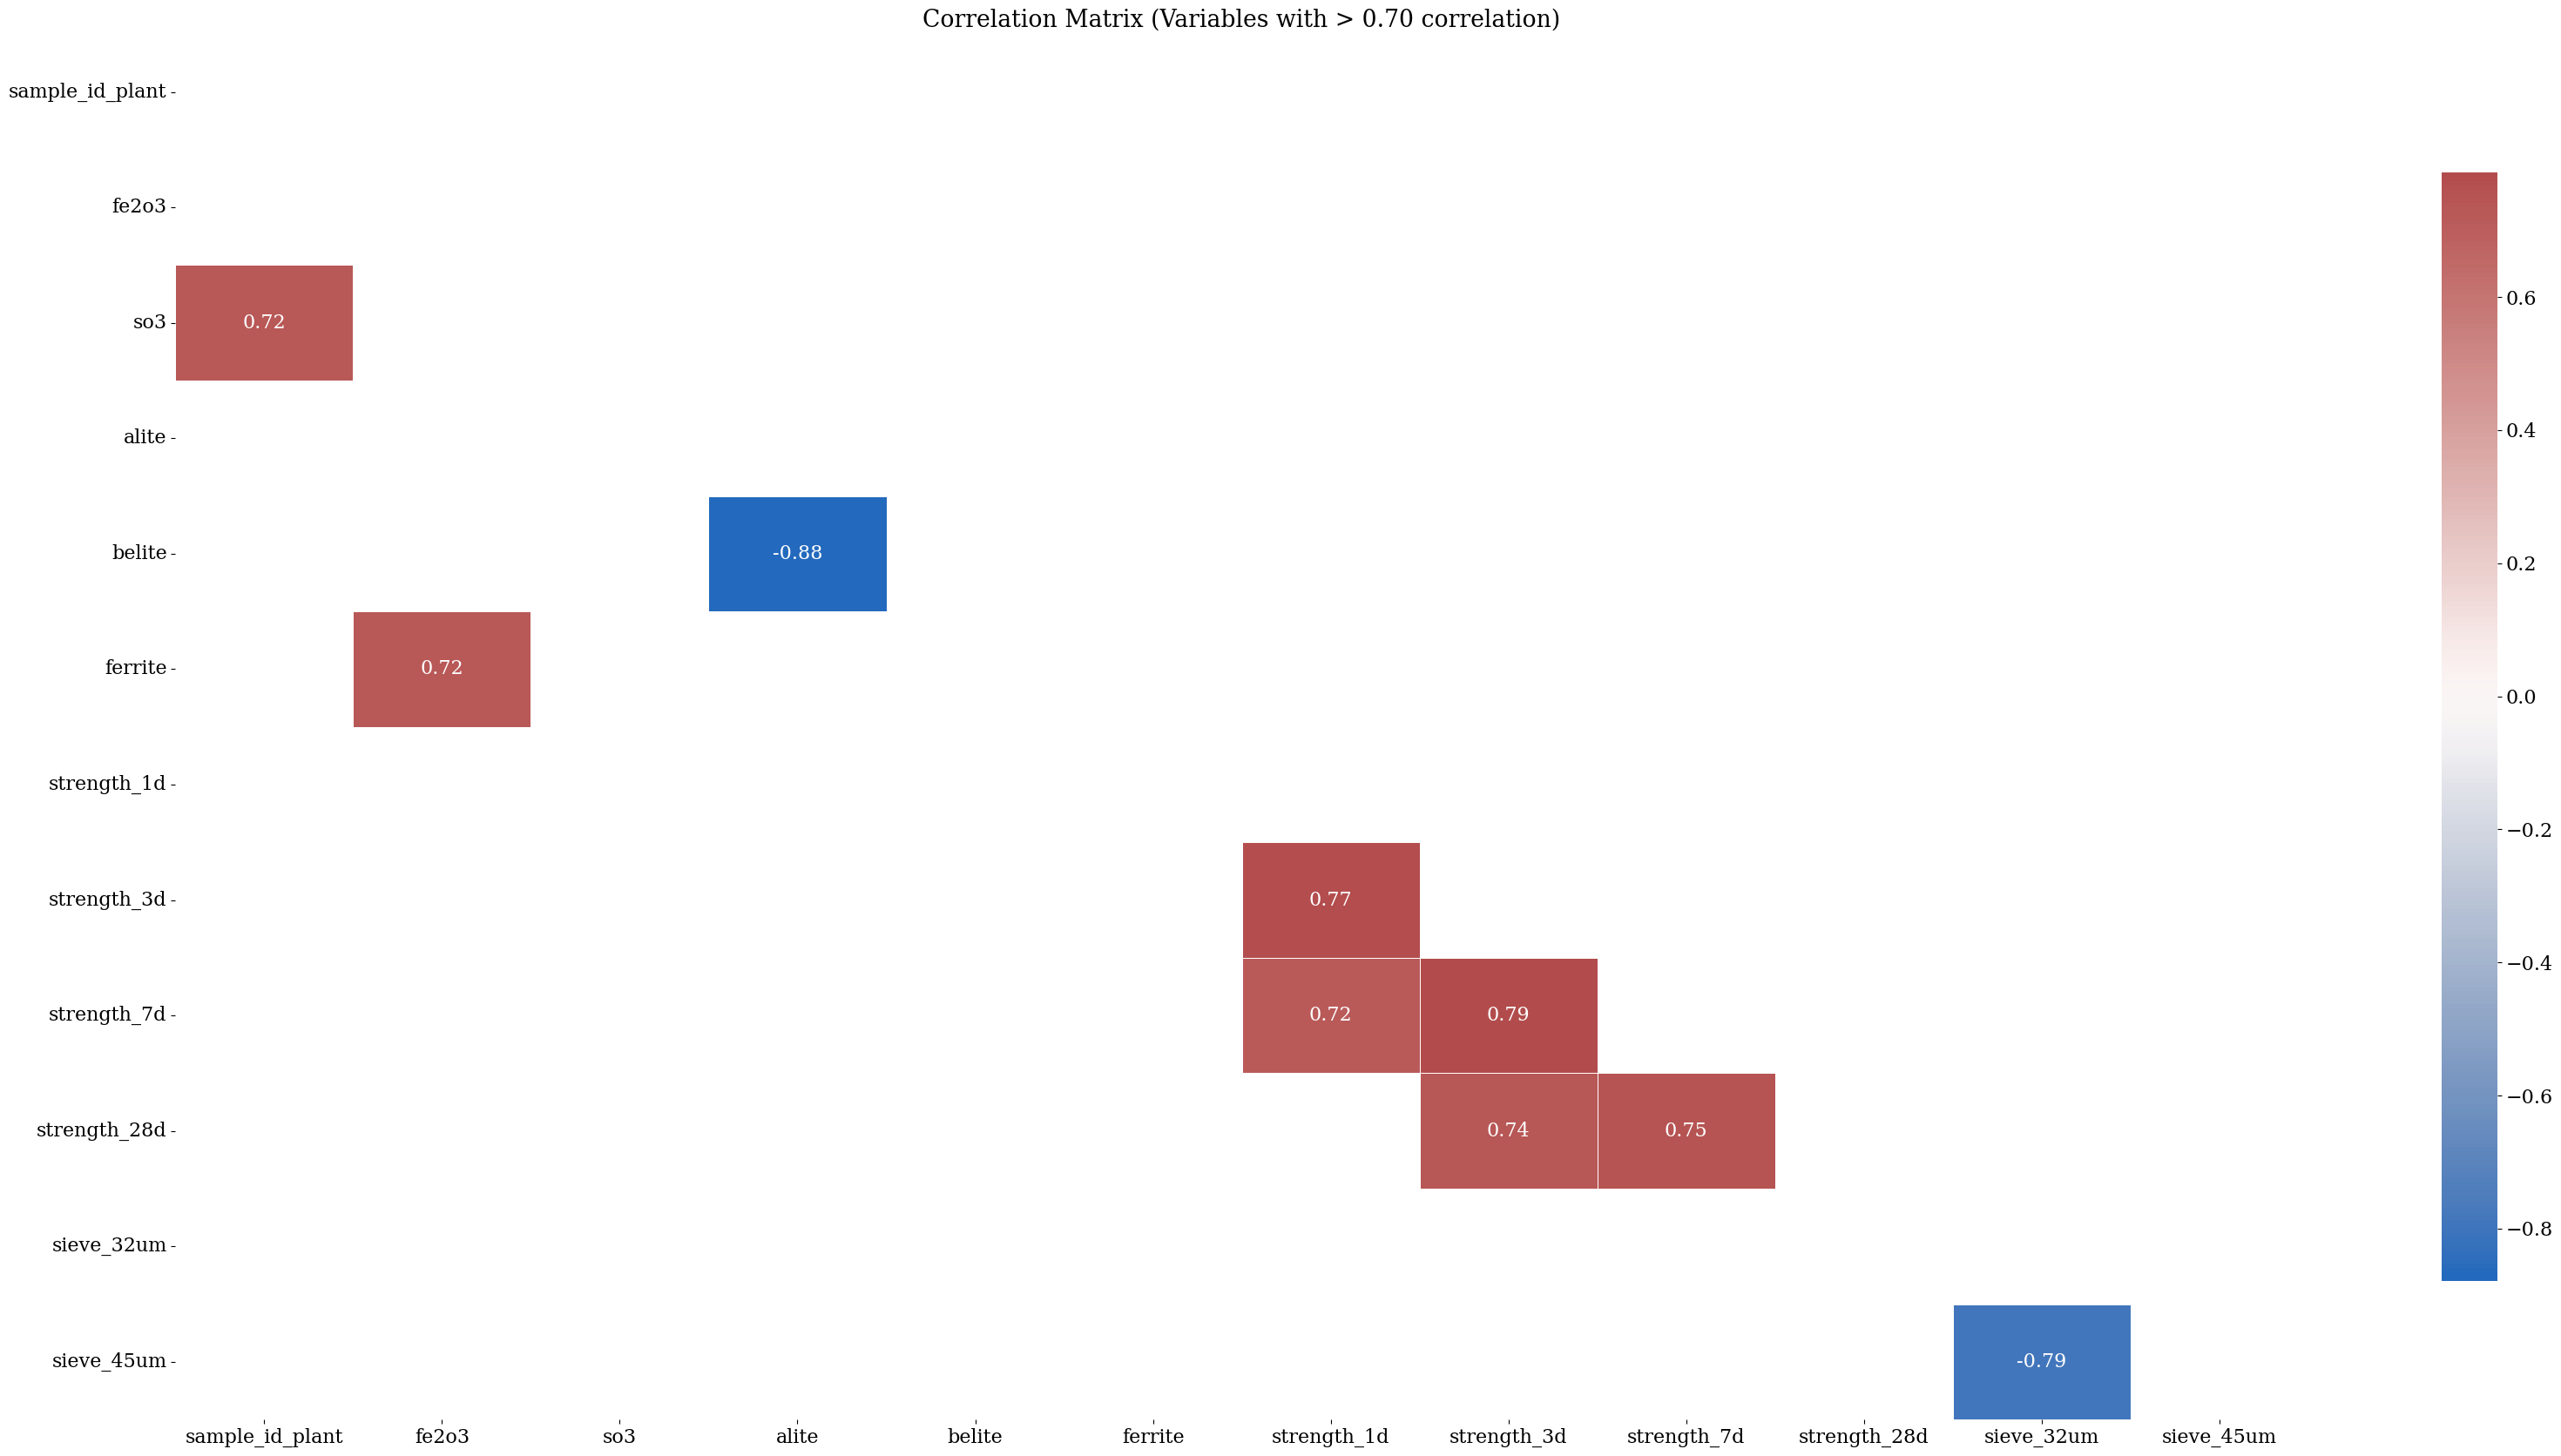

<IPython.core.display.Javascript object>

In [40]:
df_corr = df.select_dtypes(exclude=object).corr(method="spearman")


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [41]:
corr_matrix = df.select_dtypes(exclude=object).corr(method="spearman").abs()

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

alite            belite          0.878662
sieve_32um       sieve_45um      0.788701
strength_3d      strength_7d     0.786727
strength_1d      strength_3d     0.774329
strength_7d      strength_28d    0.754129
strength_3d      strength_28d    0.738805
sample_id_plant  so3             0.723664
fe2o3            ferrite         0.722684
strength_1d      strength_7d     0.719818
dtype: float64

<IPython.core.display.Javascript object>

In [42]:
sol[sol.index.map(lambda x: "strength_28d" in x)]

strength_7d      strength_28d    0.754129
strength_3d      strength_28d    0.738805
strength_1d      strength_28d    0.669760
sample_id_plant  strength_28d    0.383415
water_demand     strength_28d    0.301735
setting_initial  strength_28d    0.300059
sio2             strength_28d    0.274211
strength_28d     sieve_32um      0.269557
al2o3            strength_28d    0.268802
loi              strength_28d    0.248817
strength_28d     sieve_45um      0.243135
so3              strength_28d    0.239268
free_lime        strength_28d    0.220145
k2o              strength_28d    0.210092
alite            strength_28d    0.200558
cao              strength_28d    0.150686
belite           strength_28d    0.135544
strength_28d     blaine          0.080142
ferrite          strength_28d    0.079213
aluminate        strength_28d    0.059389
fe2o3            strength_28d    0.035603
mgo              strength_28d    0.035369
na2o             strength_28d    0.025922
dtype: float64

<IPython.core.display.Javascript object>

<h4>3.3.1 Kendall</h4>

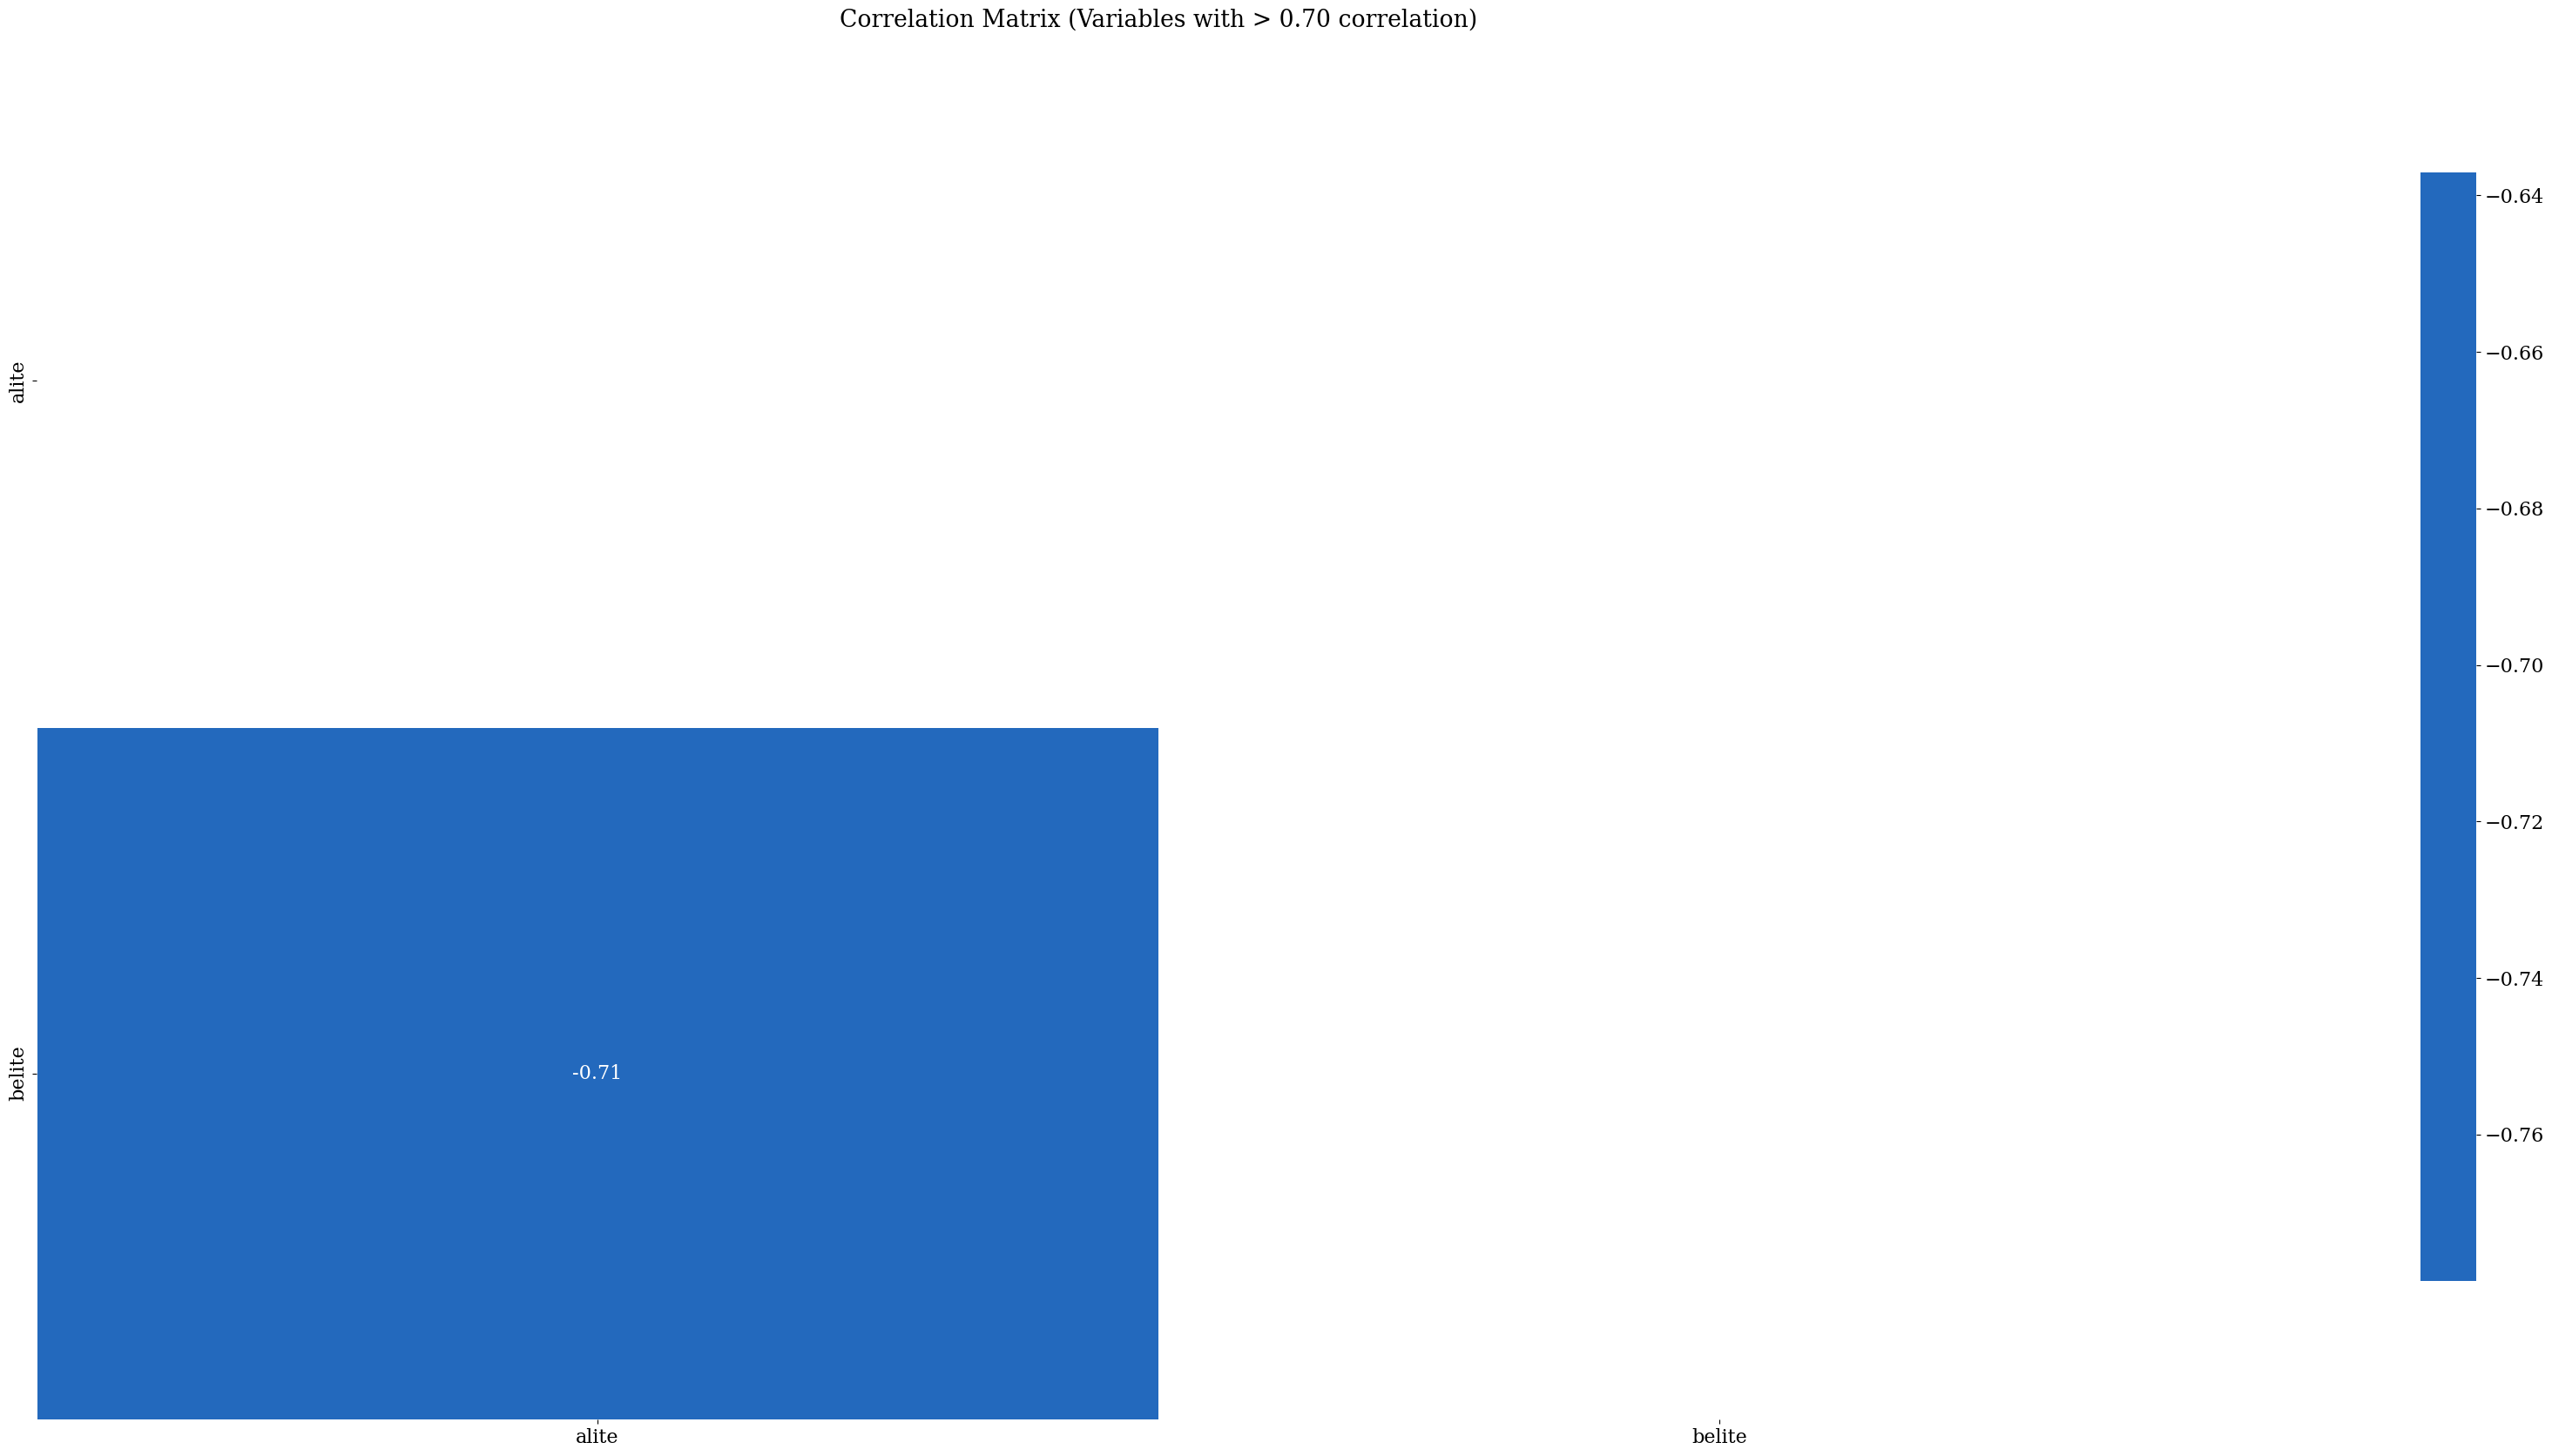

<IPython.core.display.Javascript object>

In [43]:
df_corr = df.select_dtypes(exclude=object).corr(method="kendall")


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [44]:
corr_matrix = df.select_dtypes(exclude=object).corr(method="kendall").abs()

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

alite  belite    0.707922
dtype: float64

<IPython.core.display.Javascript object>

In [45]:
sol[sol.index.map(lambda x: "strength_28d" in x)]

strength_7d      strength_28d    0.562767
strength_3d      strength_28d    0.544730
strength_1d      strength_28d    0.483912
sample_id_plant  strength_28d    0.261785
water_demand     strength_28d    0.235057
setting_initial  strength_28d    0.209573
strength_28d     sieve_32um      0.182451
sio2             strength_28d    0.181171
al2o3            strength_28d    0.180749
loi              strength_28d    0.168449
strength_28d     sieve_45um      0.165665
so3              strength_28d    0.162970
free_lime        strength_28d    0.152488
k2o              strength_28d    0.142255
alite            strength_28d    0.139358
cao              strength_28d    0.101935
belite           strength_28d    0.090613
strength_28d     blaine          0.054782
ferrite          strength_28d    0.052815
aluminate        strength_28d    0.037178
mgo              strength_28d    0.023590
fe2o3            strength_28d    0.022909
na2o             strength_28d    0.018415
dtype: float64

<IPython.core.display.Javascript object>

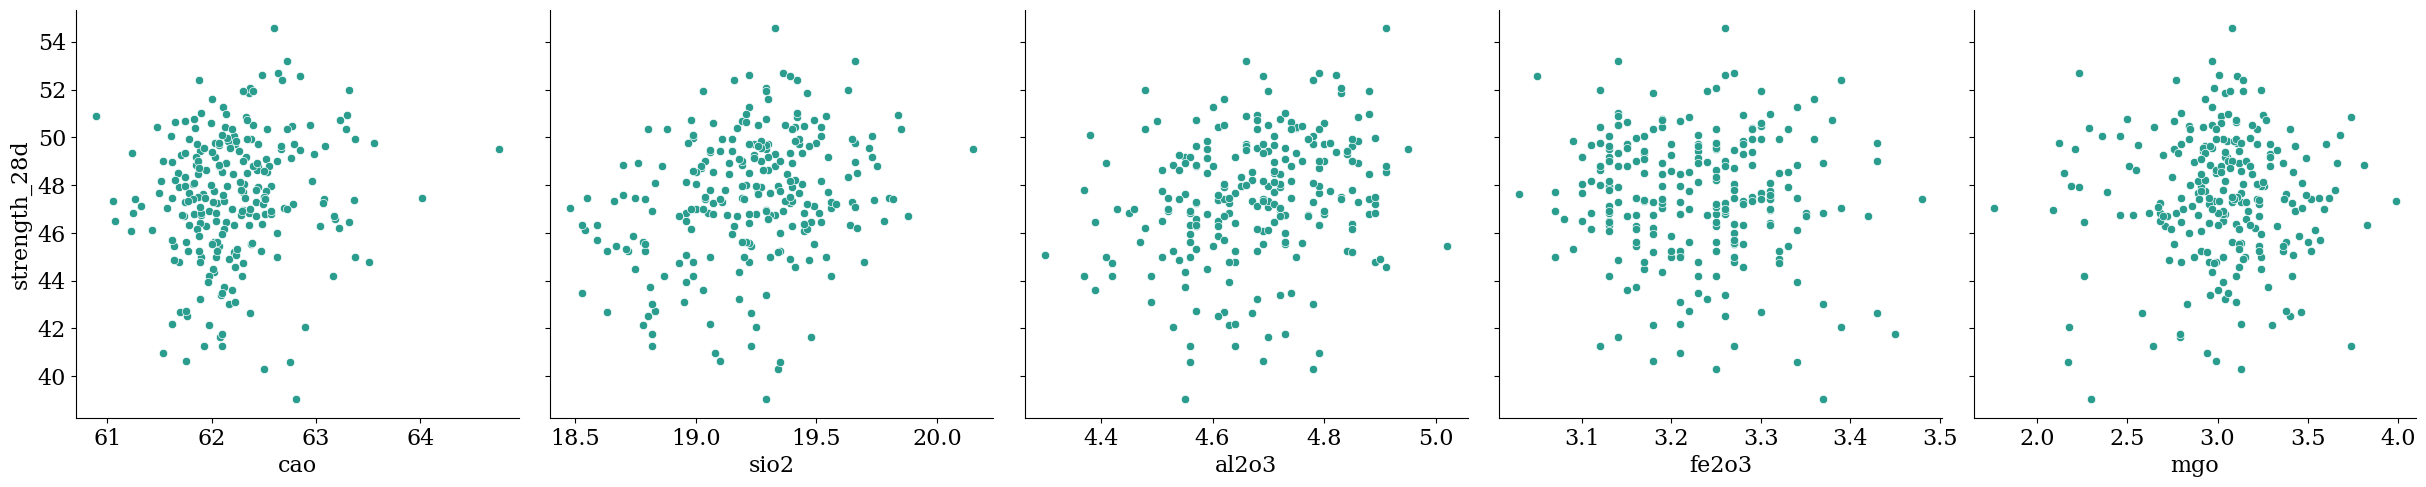

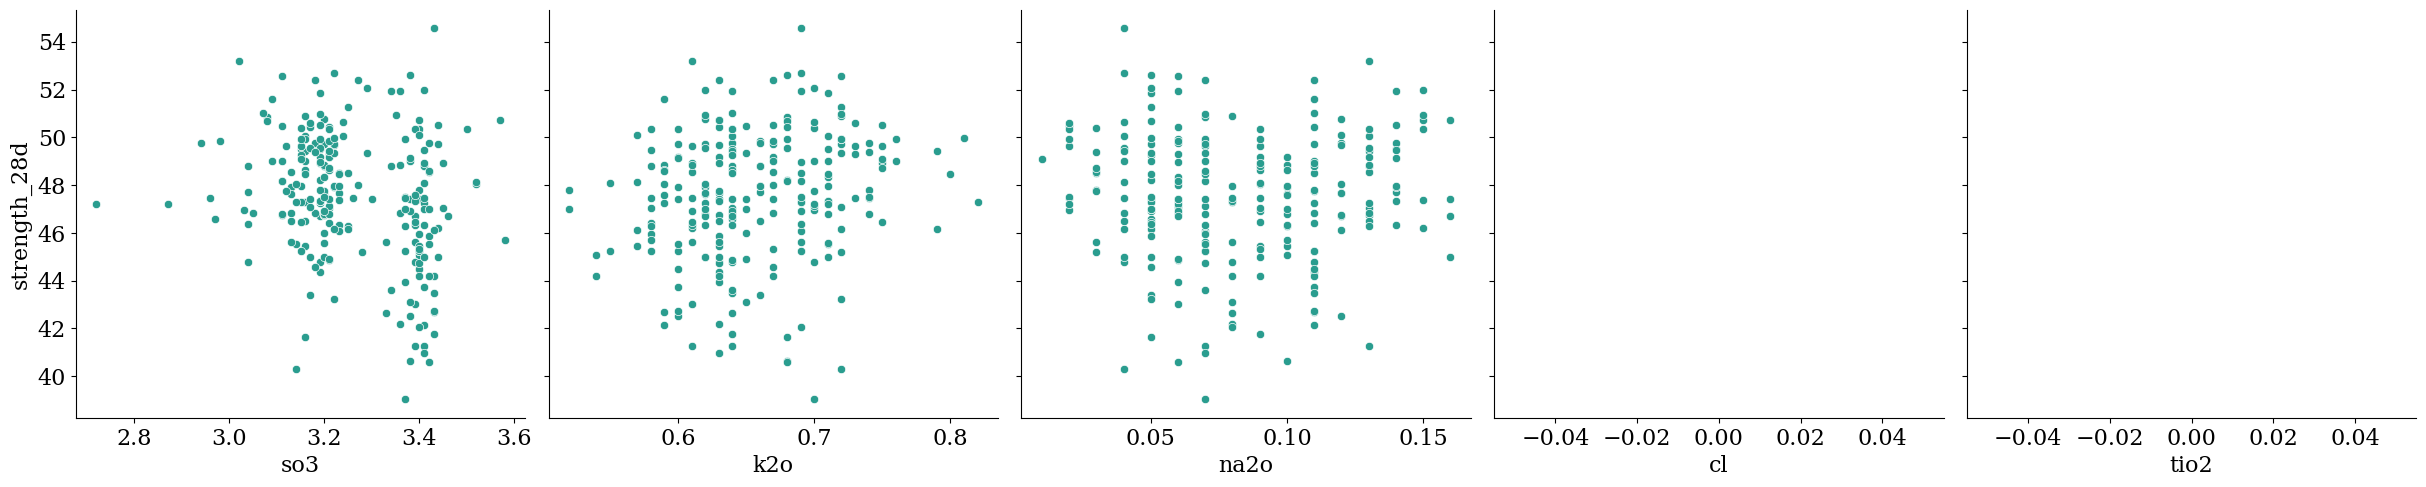

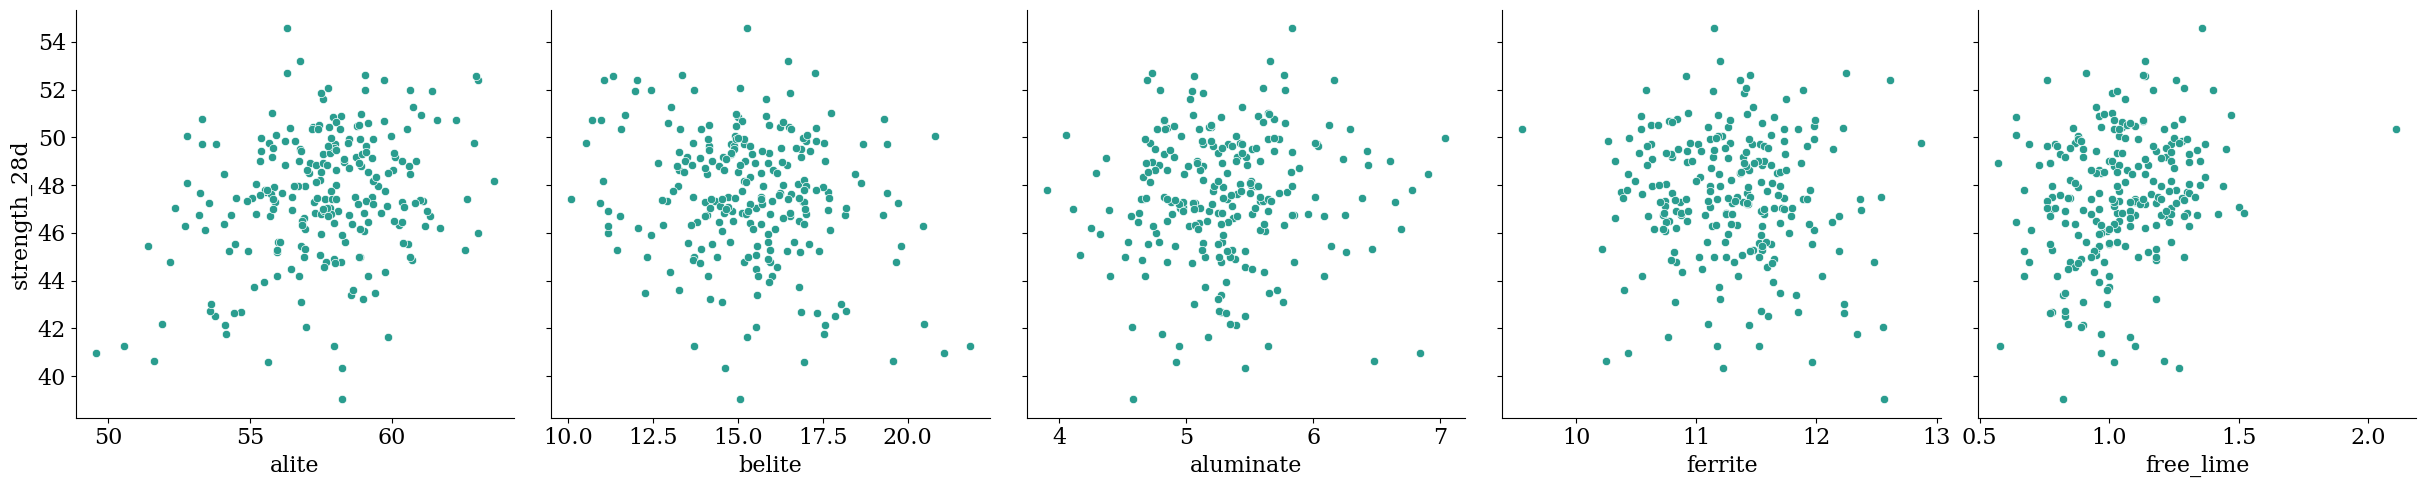

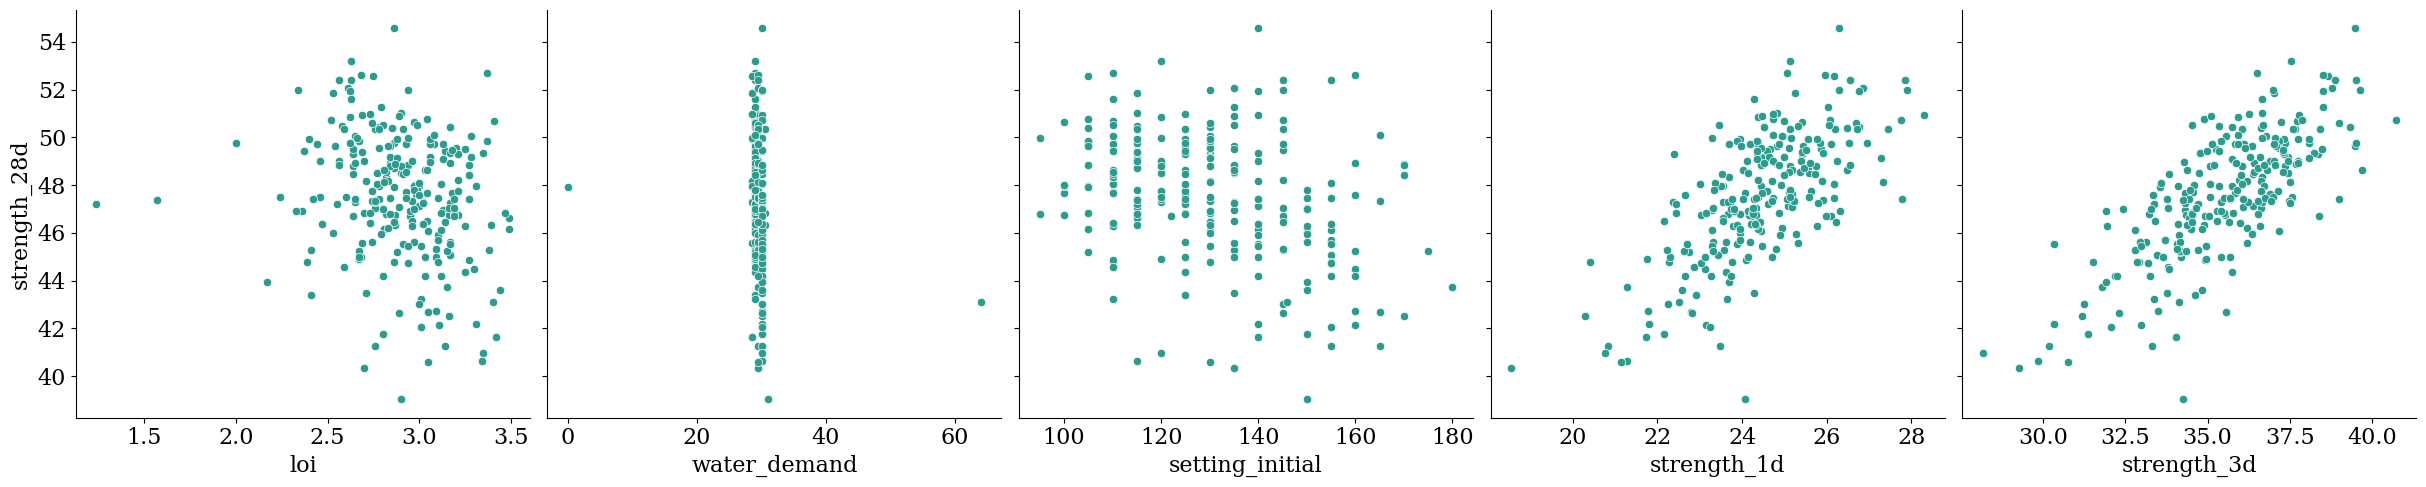

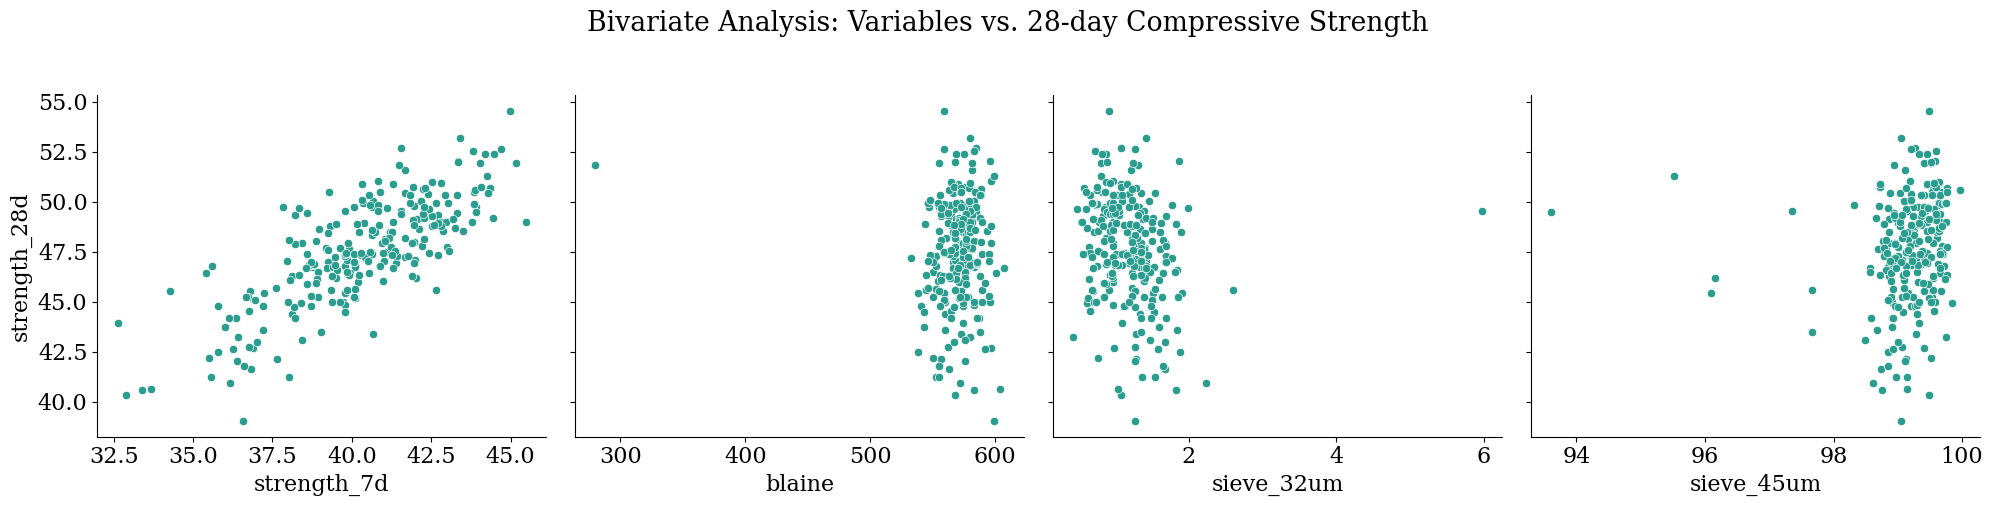

<IPython.core.display.Javascript object>

In [46]:
num_lines = 5
plots_per_line = 5

variables_to_plot = df[df.columns[4:]].select_dtypes(exclude=object).columns.tolist()
variables_to_plot.remove("strength_28d")


for n in range(num_lines):
    start_idx = n * plots_per_line
    end_idx = start_idx + plots_per_line

    grid = sns.pairplot(
        data=df,
        x_vars=variables_to_plot[start_idx:end_idx],
        y_vars=["strength_28d"],
        diag_kind="kde",
        kind="scatter",
        height=5,
    )

grid.fig.suptitle(
    "Bivariate Analysis: Variables vs. 28-day Compressive Strength", y=1.02
)
plt.tight_layout()
plt.show()

In [47]:
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f"ρ = {r:.2f}", xy=(0.1, 0.9), xycoords=ax.transAxes)
    return None

<IPython.core.display.Javascript object>

In [48]:
for pair in sol[sol > 0.75].index.values:
    if pair[0] != pair[1]:
        data = df[[pair[0], pair[1]]].dropna()
        g = sns.pairplot(
            data,
            corner=True,
            kind="reg",
            plot_kws={"line_kws": {"color": "olive"}, "scatter_kws": {"alpha": 0.2}},
        )
        corrfunc(data[pair[0]], data[pair[1]])
        g.set(xticklabels=[])
        g.set(yticklabels=[])

plt.tight_layout()

<Figure size 640x480 with 0 Axes>

<IPython.core.display.Javascript object>

### 4. Data/Hora Variable Analyses

In [49]:
dates

0      2020-01-01 11:00:00+00:00
1      2020-01-02 11:00:00+00:00
2      2020-01-05 11:00:00+00:00
3      2020-01-12 11:00:00+00:00
4      2020-01-13 11:00:00+00:00
                 ...            
239    2021-12-16 11:00:00+00:00
240    2021-12-17 11:00:00+00:00
241    2021-12-19 11:00:00+00:00
242    2021-12-27 11:00:00+00:00
243    2021-12-28 11:00:00+00:00
Name: sample_date, Length: 244, dtype: object

<IPython.core.display.Javascript object>

In [50]:
dates = pd.to_datetime(dates)

<IPython.core.display.Javascript object>

In [51]:
# How many days are valid datas e.g not weekends

valid_days = np.count_nonzero(
    np.is_busday(dates.apply(lambda x: x.date()).unique().astype("datetime64"))
)
print(valid_days, "valid days out of", len(dates.apply(lambda x: x.date()).unique()))

205 valid days out of 244


<IPython.core.display.Javascript object>

In [52]:
# All years of data
years = set(map(lambda date: date.year, dates))
print("Years present in the data:", years)

Years present in the data: {2020, 2021}


<IPython.core.display.Javascript object>

In [53]:
# What are months the data was collected for every year?

months_each_year = {}
for year in years:
    months_each_year[year] = set([date.month for date in dates if date.year == year])

print("Months of data for each year:")
months_each_year

Months of data for each year:


{2020: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2021: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}}

<IPython.core.display.Javascript object>

In [54]:
# How many unique days every month has for every year?

year = dates.dt.year
month = dates.dt.month
day = dates.dt.day

# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month, "Day": day})

# Count the number of dates in each year and month
df_year_month = df_year_month.groupby(["Year", "Month"])["Day"].apply(
    lambda x: len(x.unique())
)

# Give a name to the series
df_year_month.name = "Unique days per month"

# Print the dataframe
print(df_year_month)

Year  Month
2020  1        13
      2         8
      3        15
      4        14
      5        10
      6        10
      7        13
      8        13
      9        10
      10       10
      11       14
      12       11
2021  1         8
      2        11
      3        14
      4        11
      5         3
      6        10
      7         7
      8        11
      9         7
      10        5
      11       10
      12        6
Name: Unique days per month, dtype: int64


<IPython.core.display.Javascript object>

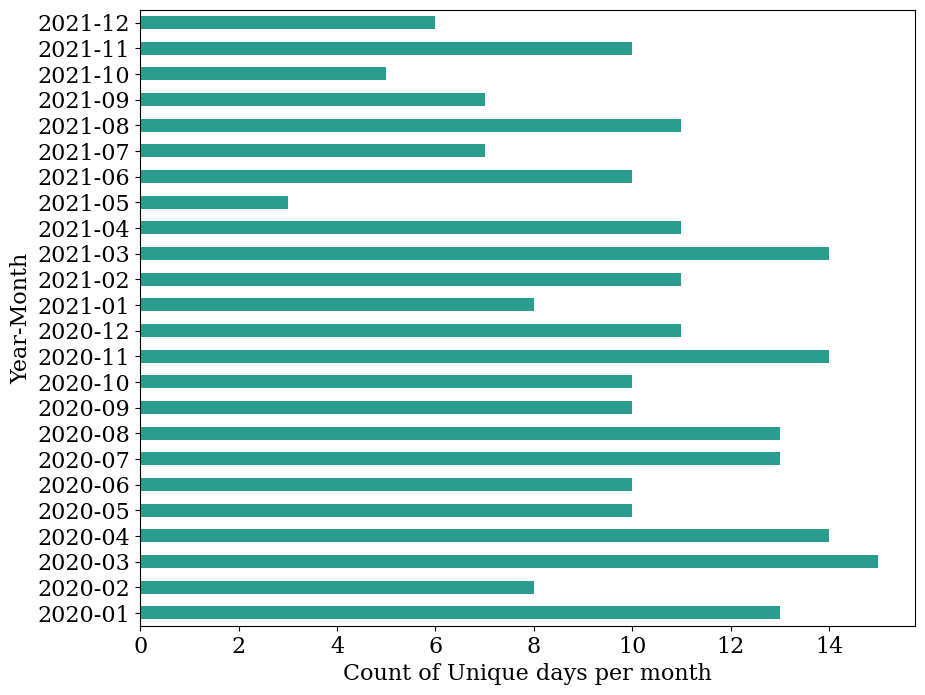

<IPython.core.display.Javascript object>

In [55]:
df_year_month_copy = df_year_month.copy()
df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"),

df_year_month_copy.index = (
    pd.to_datetime(
        df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"), format="%Y-%m"
    ).to_period("M")
    # .strftime("%b %Y")
)
df_year_month_copy.index

plt.figure(figsize=(10, 8))
ax = df_year_month_copy.plot(kind="barh")
ax.set_ylabel("Year-Month")
ax.set_xlabel("Count of Unique days per month")
None

In [56]:
# How many data points every month has for every year?

year = dates.dt.year
month = dates.dt.month

# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month})

# Count the number of dates in each year and month
df_year_month = df_year_month.groupby(["Year", "Month"]).size()

# Give a name to the series
df_year_month.name = "size"

# Print the dataframe
print(df_year_month)

Year  Month
2020  1        13
      2         8
      3        15
      4        14
      5        10
      6        10
      7        13
      8        13
      9        10
      10       10
      11       14
      12       11
2021  1         8
      2        11
      3        14
      4        11
      5         3
      6        10
      7         7
      8        11
      9         7
      10        5
      11       10
      12        6
Name: size, dtype: int64


<IPython.core.display.Javascript object>

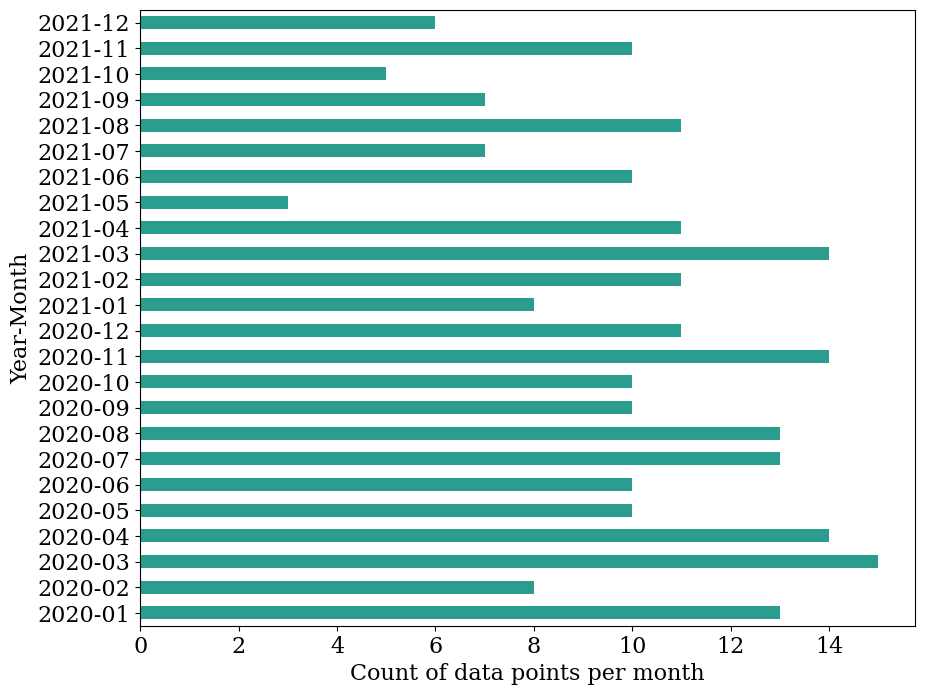

<IPython.core.display.Javascript object>

In [57]:
df_year_month_copy = df_year_month.copy()
df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"),

df_year_month_copy.index = (
    pd.to_datetime(
        df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"), format="%Y-%m"
    ).to_period("M")
    # .strftime("%b %Y")
)
df_year_month_copy.index

plt.figure(figsize=(10, 8))
ax = df_year_month_copy.plot(kind="barh")
ax.set_ylabel("Year-Month")
ax.set_xlabel("Count of data points per month")
None

In [58]:
# What is the year-month with the minimum and maximum number of collected data points?

df_reseted = df_year_month.reset_index()
df_reseted["Year_Month"] = (
    df_reseted["Year"].apply(str) + "-" + df_reseted["Month"].apply(str)
)

min_obs_key, min_obs_value = df_reseted[df_reseted["size"] == df_reseted["size"].min()][
    ["Year_Month", "size"]
].values[0]

max_obs_key, max_obs_value = df_reseted[df_reseted["size"] == df_reseted["size"].max()][
    ["Year_Month", "size"]
].values[0]


print(min_obs_key, "has the minimum number of days with samples -", min_obs_value)
print(max_obs_key, "has the maximum number of days with samples -", max_obs_value)

2021-5 has the minimum number of days with samples - 3
2020-3 has the maximum number of days with samples - 15


<IPython.core.display.Javascript object>

In [59]:
# How many times every day reapeats for each year-month?

year = dates.dt.year
month = dates.dt.month
day = dates.dt.day
# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month, "Day": day})


# Group by year, month, and day, and count occurrences
day_counts = (
    df_year_month.groupby(["Year", "Month", "Day"]).size().reset_index(name="DayCount")
)

day_counts[["DayCount"]].describe()

,DayCount
count,244.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


<IPython.core.display.Javascript object>

In [60]:
day_counts[["DayCount"]].value_counts()

DayCount
1           244
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [61]:
day_counts[day_counts["DayCount"] == day_counts["DayCount"].max()]

,Year,Month,Day,DayCount
0,2020,1,1,1
1,2020,1,2,1
2,2020,1,5,1
3,2020,1,12,1
4,2020,1,13,1
...,...,...,...,...
239,2021,12,16,1
240,2021,12,17,1
241,2021,12,19,1
242,2021,12,27,1


<IPython.core.display.Javascript object>

In [62]:
df_copy = df.copy()
df_copy["sample_date"] = pd.to_datetime(df_copy["sample_date"])
df_copy["Year"] = df_copy["sample_date"].dt.year
df_copy["Month"] = df_copy["sample_date"].dt.month
df_copy["Day"] = df_copy["sample_date"].dt.day

df_merge = df_copy.merge(right=day_counts, how="left", on=["Year", "Month", "Day"])

uniques = df_merge["DayCount"].unique()
uniques.sort()

for daycount in uniques:
    nulls = df_merge[df_merge["DayCount"] == daycount]["strength_28d"].isna().sum()
    print(daycount, nulls)

1 0


<IPython.core.display.Javascript object>

In [63]:
# Here we get the frequency of the whole time series

diffs = []

for i in range(1, len(dates)):
    diffs.append(dates[i] - dates[i - 1])
# diffs

<IPython.core.display.Javascript object>

In [64]:
# Average Frequency
np.mean(diffs)

Timedelta('2 days 23:48:08.888888888')

<IPython.core.display.Javascript object>

In [65]:
Counter(diffs)

Counter({Timedelta('1 days 00:00:00'): 122,
         Timedelta('2 days 00:00:00'): 24,
         Timedelta('3 days 00:00:00'): 21,
         Timedelta('7 days 00:00:00'): 17,
         Timedelta('5 days 00:00:00'): 16,
         Timedelta('4 days 00:00:00'): 14,
         Timedelta('6 days 00:00:00'): 8,
         Timedelta('8 days 00:00:00'): 6,
         Timedelta('9 days 00:00:00'): 2,
         Timedelta('17 days 00:00:00'): 1,
         Timedelta('5 days 23:00:00'): 1,
         Timedelta('11 days 00:00:00'): 1,
         Timedelta('3 days 01:00:00'): 1,
         Timedelta('10 days 00:00:00'): 1,
         Timedelta('15 days 00:00:00'): 1,
         Timedelta('2 days 23:00:00'): 1,
         Timedelta('18 days 00:00:00'): 1,
         Timedelta('16 days 00:00:00'): 1,
         Timedelta('12 days 00:00:00'): 1,
         Timedelta('2 days 03:30:00'): 1,
         Timedelta('6 days 20:30:00'): 1,
         Timedelta('5 days 01:00:00'): 1})

<IPython.core.display.Javascript object>

<Axes: xlabel='count'>

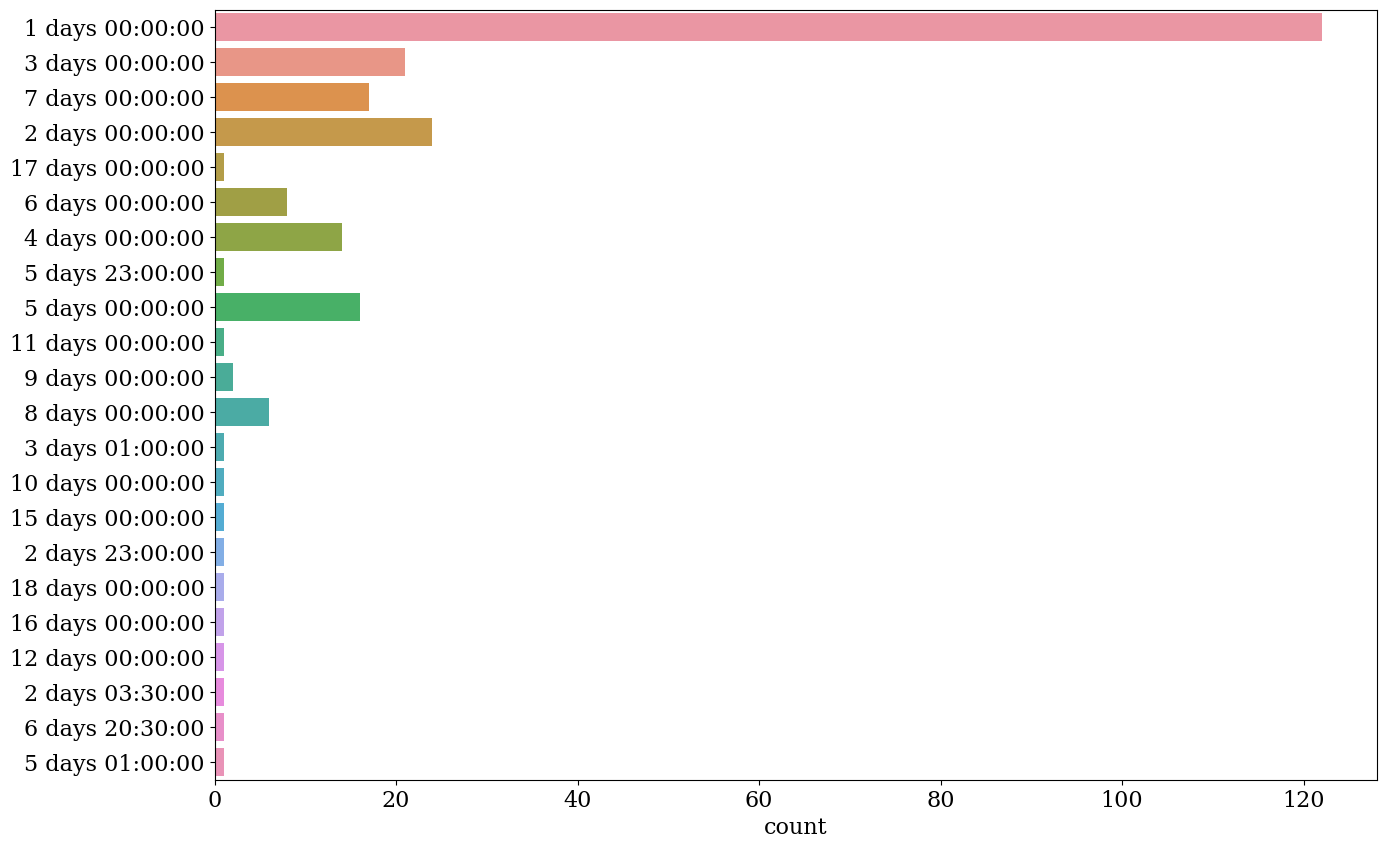

<IPython.core.display.Javascript object>

In [66]:
# sns.set_theme(style="darkgrid")
plt.figure(figsize=(15, 10))
sns.countplot(y=diffs)

In [67]:
# percent of diffs
[round(val / df.shape[0] * 100, 2) for val in list(Counter(diffs).values())]

[50.0,
 8.61,
 6.97,
 9.84,
 0.41,
 3.28,
 5.74,
 0.41,
 6.56,
 0.41,
 0.82,
 2.46,
 0.41,
 0.41,
 0.41,
 0.41,
 0.41,
 0.41,
 0.41,
 0.41,
 0.41,
 0.41]

<IPython.core.display.Javascript object>

In [68]:
df["sample_date"] = pd.to_datetime(df["sample_date"])

<IPython.core.display.Javascript object>

### Compressive Strength Distribution

#### 1 Days

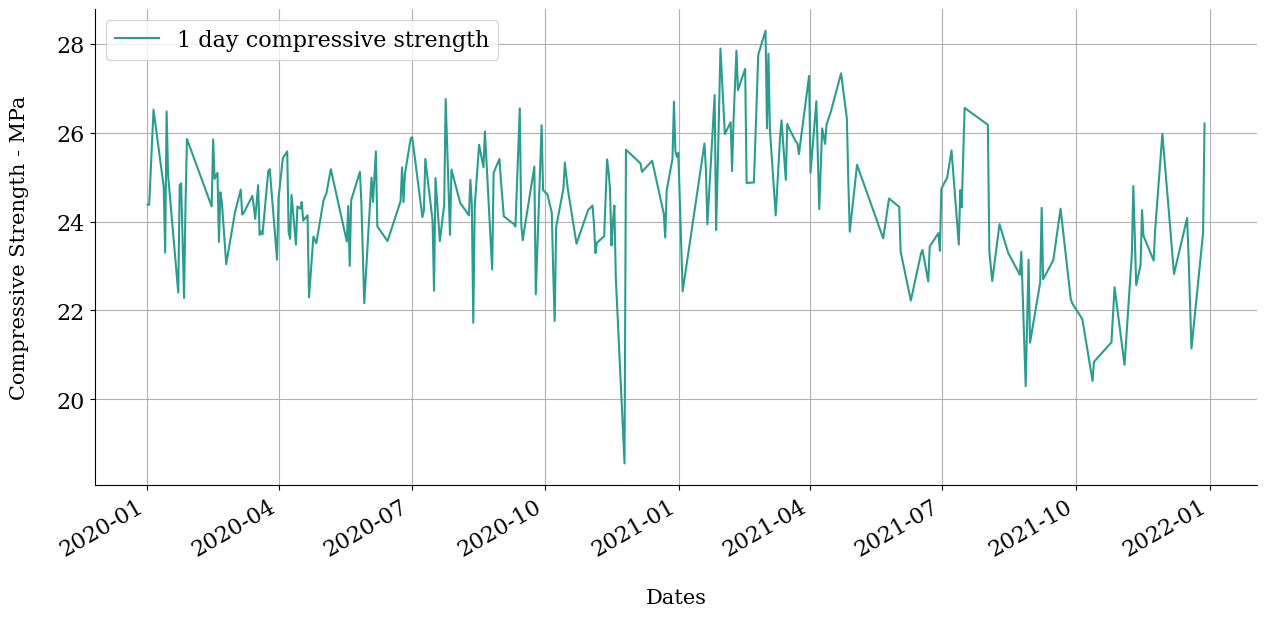

<IPython.core.display.Javascript object>

In [69]:
tmp = df[["sample_date", "strength_1d"]].dropna().copy()
tmp = tmp.set_index("sample_date")
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["1 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.show()

#### 3 Days

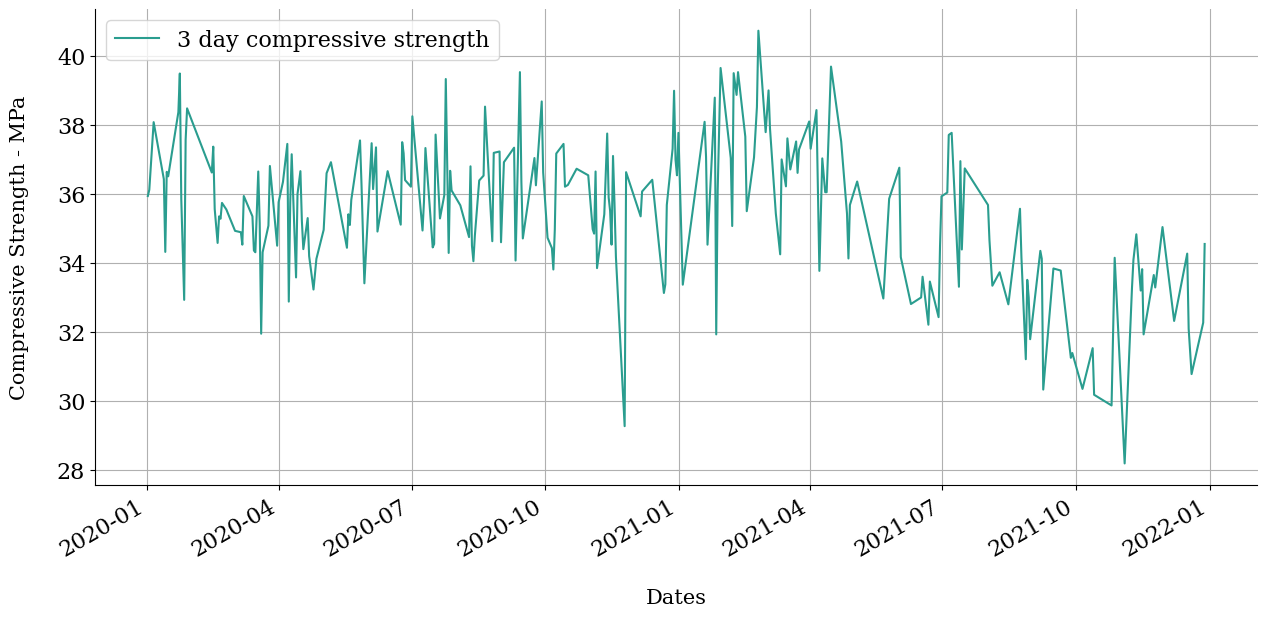

<IPython.core.display.Javascript object>

In [70]:
tmp = df[["sample_date", "strength_3d"]].dropna().copy()
tmp = tmp.set_index("sample_date")
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["3 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.show()

#### 7 Days

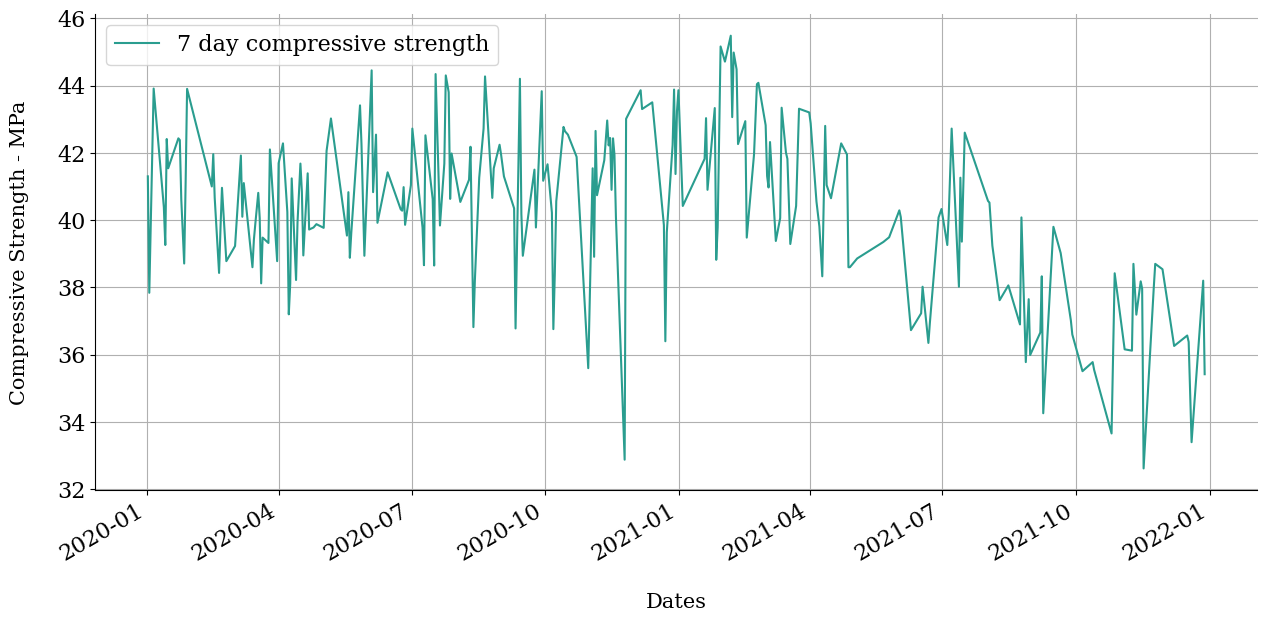

<IPython.core.display.Javascript object>

In [71]:
tmp = df[["sample_date", "strength_7d"]].dropna().copy()
tmp = tmp.set_index("sample_date")
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["7 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.show()

#### 28 Days

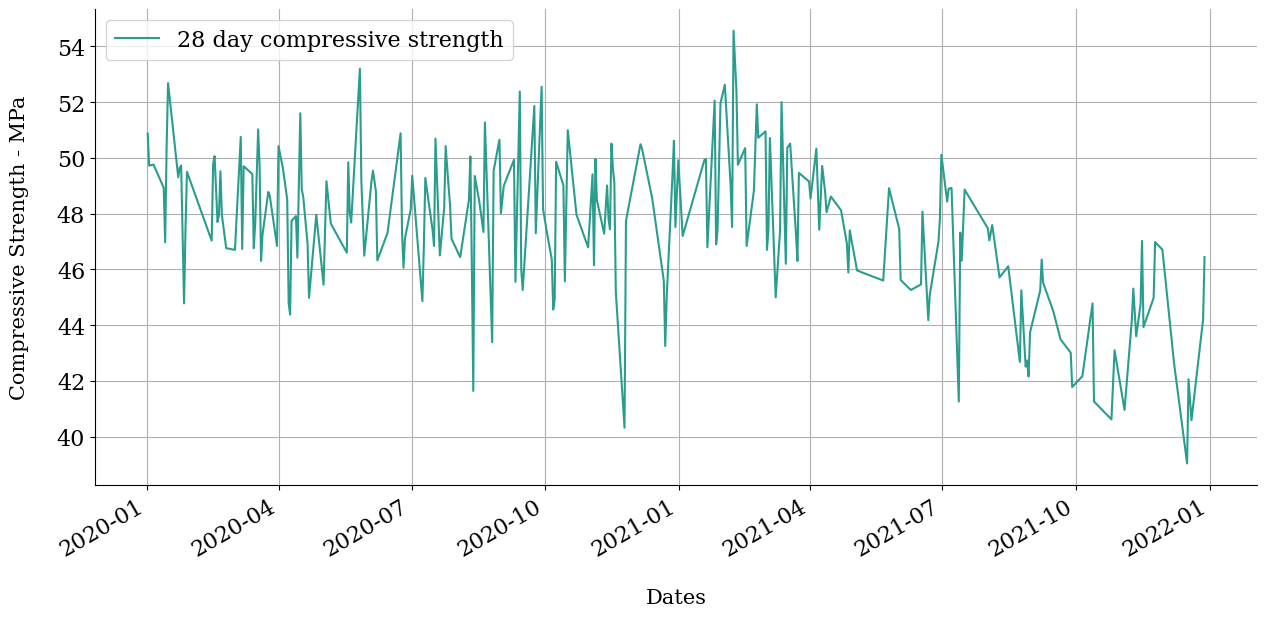

<IPython.core.display.Javascript object>

In [72]:
tmp = df[["sample_date", "strength_28d"]].dropna().copy()
tmp = tmp.set_index("sample_date")
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["28 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.show()